# Necessary imports


In [1]:
#importing necessary laberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.multiclass import OneVsRest

# Data Processing



First, let's load the data


In [2]:
math_df = pd.read_csv("student-mat.csv", sep=";")
por_df = pd.read_csv("student-por.csv", sep=";")

print("Math Dataset Shape:", math_df.shape)
print("Portuguese Dataset Shape:", por_df.shape)

Math Dataset Shape: (395, 33)
Portuguese Dataset Shape: (649, 33)


## General Exploration

In [3]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Verify that they have exactly the same features, as their numbers are equal.


In [5]:
print("Math Dataset Columns:\n", math_df.columns.tolist())
print("\nPortuguese Dataset Columns:\n", por_df.columns.tolist())

Math Dataset Columns:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Portuguese Dataset Columns:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


Here is clear that the two datasets have the same:


*   Number of features
*   Features name

To work with a more comprhensive but unique dataset, we can merge both athematics course (student-mat.csv) and the other for the Portuguese language course (student-por.csv).





## Merging The Two Datasets


Although these datasets share common features (like demographic and background information), they each contain distinct grade columns (G1, G2, G3) that are specific to their subject.

To properly merge the datasets without losing or duplicating information, we followed this approach:



1.   We used a set of common columns ("school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", and "internet") as the merge keys. These attributes are likely to identify the same student across both datasets.
2.   We used an inner join to ensure that only students who appear in both datasets — and match on all merge columns — are included in the final result.
3. After the merge, each grade column (G1,G2,G3) appeared twice: once for math (with _x suffix) and once for Portuguese (with _y suffix).
4. We then renamed the duplicated grade columns to G1_math, G2_math, G3_math and G1_por, G2_por, G3_por respectively, to clearly distinguish them by subject.



In [6]:
# Columns to merge on — identifying a student
merge_columns = [
    "school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"
]

# Perform the merge — inner join to keep only students in both datasets
# Perform an inner merge on identifying columns
merged_df = pd.merge(
    math_df,
    por_df,
    on=merge_columns,
    suffixes=('_math', '_por'),
    how='inner'
)

# Check that grades are kept from both subjects
print(merged_df[["G1_math", "G2_math", "G3_math", "G1_por", "G2_por", "G3_por"]].head())


   G1_math  G2_math  G3_math  G1_por  G2_por  G3_por
0        5        6        6       0      11      11
1        5        5        6       9      11      11
2        7        8       10      12      13      12
3       15       14       15      14      14      14
4        6       10       10      11      13      13


In [7]:

print("Dataset Columns Number:\n", len(merged_df.columns.tolist()))
print("Merged Dataset Columns:\n", merged_df.columns.tolist())

Dataset Columns Number:
 53
Merged Dataset Columns:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian_math', 'traveltime_math', 'studytime_math', 'failures_math', 'schoolsup_math', 'famsup_math', 'paid_math', 'activities_math', 'nursery', 'higher_math', 'internet', 'romantic_math', 'famrel_math', 'freetime_math', 'goout_math', 'Dalc_math', 'Walc_math', 'health_math', 'absences_math', 'G1_math', 'G2_math', 'G3_math', 'guardian_por', 'traveltime_por', 'studytime_por', 'failures_por', 'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por', 'higher_por', 'romantic_por', 'famrel_por', 'freetime_por', 'goout_por', 'Dalc_por', 'Walc_por', 'health_por', 'absences_por', 'G1_por', 'G2_por', 'G3_por']


### Handling Duplicate Feature Columns After Merging

After merging the two student datasets, we retained all columns from both datasets. This approach preserves the subject-specific grades (G1, G2, G3) and also allows us to compare other overlapping features across both subjects.


However, as showen in the code below, this results in several duplicated features with different suffixes (_math, _por),

In [8]:
print(merged_df[['guardian_math', 'traveltime_math', 'studytime_math', 'failures_math', 'schoolsup_math', 'famsup_math', 'paid_math', 'activities_math', 'nursery', 'higher_math', 'internet', 'romantic_math', 'famrel_math', 'freetime_math', 'goout_math', 'Dalc_math', 'Walc_math', 'health_math', 'absences_math']].head())

  guardian_math  traveltime_math  studytime_math  failures_math  \
0        mother                2               2              0   
1        father                1               2              0   
2        mother                1               2              3   
3        mother                1               3              0   
4        father                1               2              0   

  schoolsup_math famsup_math paid_math activities_math nursery higher_math  \
0            yes          no        no              no     yes         yes   
1             no         yes        no              no      no         yes   
2            yes          no       yes              no     yes         yes   
3             no         yes       yes             yes     yes         yes   
4             no         yes       yes              no     yes         yes   

  internet romantic_math  famrel_math  freetime_math  goout_math  Dalc_math  \
0       no            no            4            

In [9]:
print(merged_df[['guardian_por', 'traveltime_por', 'studytime_por', 'failures_por', 'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por', 'higher_por', 'romantic_por', 'famrel_por', 'freetime_por', 'goout_por', 'Dalc_por', 'Walc_por', 'health_por', 'absences_por', ]].head())

  guardian_por  traveltime_por  studytime_por  failures_por schoolsup_por  \
0       mother               2              2             0           yes   
1       father               1              2             0            no   
2       mother               1              2             0           yes   
3       mother               1              3             0            no   
4       father               1              2             0            no   

  famsup_por paid_por activities_por higher_por romantic_por  famrel_por  \
0         no       no             no        yes           no           4   
1        yes       no             no        yes           no           5   
2         no       no             no        yes           no           4   
3        yes       no            yes        yes          yes           3   
4        yes       no             no        yes           no           4   

   freetime_por  goout_por  Dalc_por  Walc_por  health_por  absences_por  
0    

In [10]:
merged_df[['G1_math']].describe()

,G1_math
count,382.000000
mean,10.861257
std,3.349167
min,3.000000
25%,8.000000
50%,10.500000
75%,13.000000
max,19.000000


In [11]:
merged_df[['guardian_por', 'traveltime_por', 'studytime_por', 'failures_por', 'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por', 'higher_por', 'romantic_por', 'famrel_por', 'freetime_por', 'goout_por', 'Dalc_por', 'Walc_por', 'health_por', 'absences_por', ]].describe()

,traveltime_por,studytime_por,failures_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,1.445026,2.039267,0.141361,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775
std,0.699354,0.845571,0.513253,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000
max,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000


###  Interpreting Redundant Columns







To clean up the dataset, we systematically compared each _math column with its corresponding _por column.

While these features refer to the same students, their values occasionally differ between the two subjects. When all values were found to be identical, we treated the column as redundant and safely dropped one version. Otherwise, we either retained both columns, considered combining them into a new derived feature, or drop them, depending on the context.

Although some level of redundancy was expected—since the datasets were merged using stable student attributes and only the subject-specific grades were assumed to differ—these discrepancies are understandable. The Math and Portuguese datasets were collected independently and possibly at different times. As a result, variables such as study time, health status, or parental support may vary across subjects due to changes in circumstances or differences in how information was reported. This could be seen in the result of .describe() above.

We included this comparison step as a validation measure to ensure internal consistency and to provide a clear justification for any decisions made regarding the handling of duplicated subject-specific features.



In [12]:
# List of shared column roots
shared_columns = [
    "guardian", "traveltime", "studytime", "failures", "schoolsup", "famsup", "paid",
    "activities", "higher", "romantic", "famrel", "freetime", "goout", "Dalc",
    "Walc", "health"
]
# Initialize a mask that starts as all True
all_equal_mask = pd.Series(True, index=merged_df.index)


# Compare each pair of columns
for col in shared_columns:
    col_math = f"{col}_math"
    col_por = f"{col}_por"

    if col_math in merged_df.columns and col_por in merged_df.columns:
        # Update mask: keep only rows where both columns are equal
        all_equal_mask &= merged_df[col_math] == merged_df[col_por]

# Save indices where all columns are equal
equal_rows = merged_df[all_equal_mask].index.tolist()

# Save indices where at least one pair of columns differ
unequal_rows = merged_df[~all_equal_mask].index.tolist()

# Convert to DataFrame for reporting
equals_df = pd.DataFrame({'row': equal_rows})
unequals_df = pd.DataFrame({'row': unequal_rows})

print(f"Rows where ALL shared columns match: {len(equals_df)}, which represent {len(equals_df)/len(merged_df)*100:.2f} % of the total data")
print(f"Rows where AT LEAST ONE shared column differs: {len(unequals_df)}, which represent {len(unequals_df)/len(merged_df)*100:.2f} % of the total data ")

Rows where ALL shared columns match: 162, which represent 42.41 % of the total data
Rows where AT LEAST ONE shared column differs: 220, which represent 57.59 % of the total data 


### Ploting Duplicate Feature Colomns Distribution Side by Side

As we can see, the number of lines where there are differences in respective columns can not be ignored.

We will inspect more in details their diffrences, separatly: categorial/numerical attributes.

So, in the following, for each type (categorial/numerical) of feature, we will be:


1. Compares each shared feature (_math vs _por) side by side.

2. Normalizes the value counts to proportions.

3. Plots grouped bars by value for each feature using seaborn.catplot.



Feature Values : ['father' 'other' 'mother' 'yes' 'no']


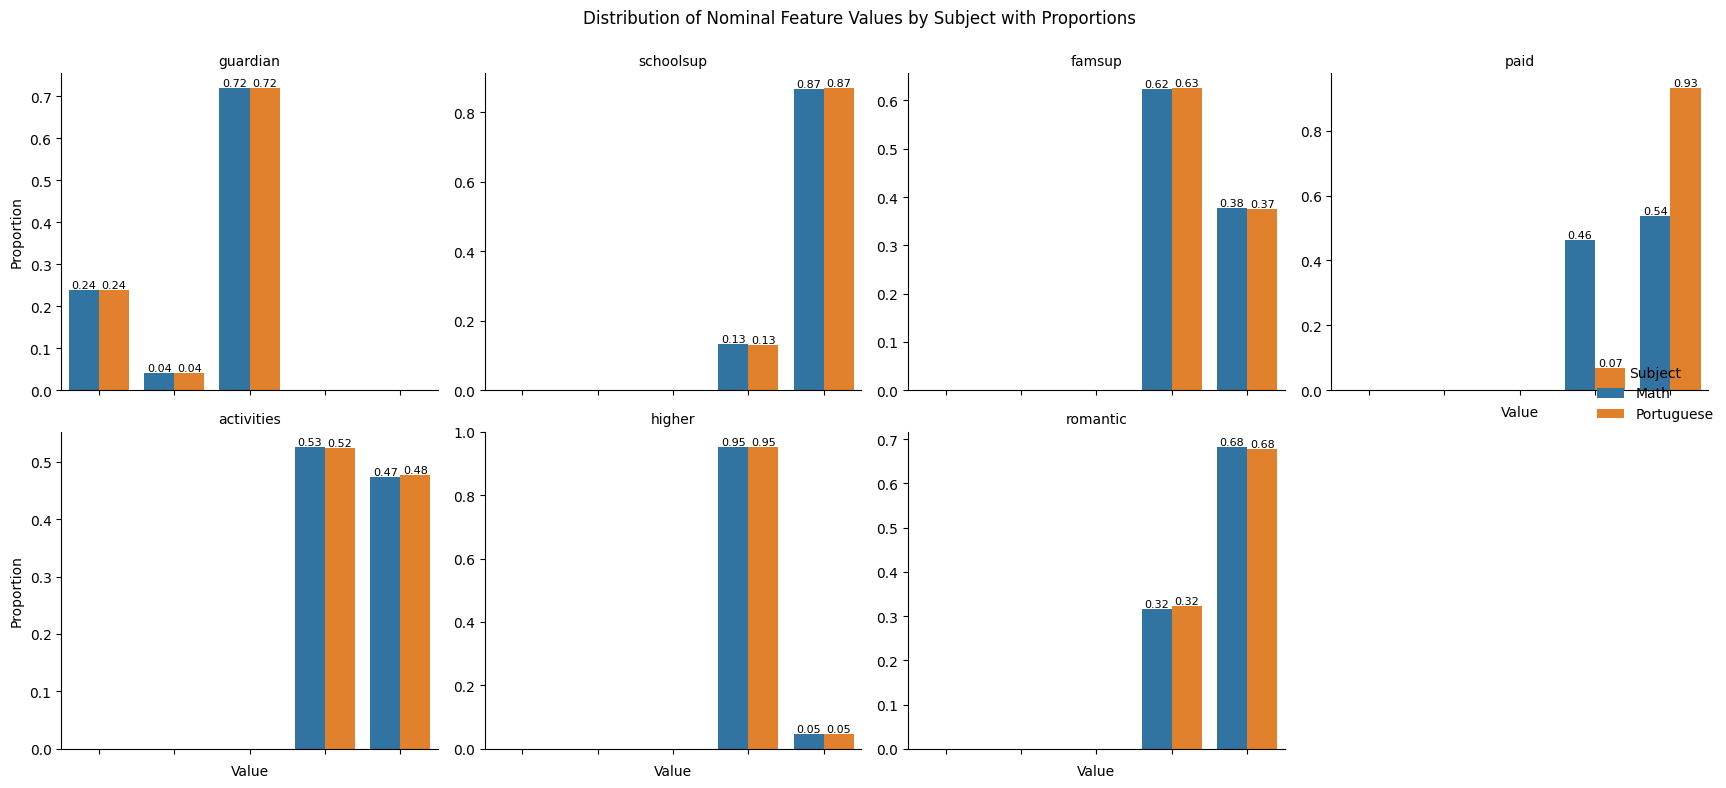

In [13]:
shared_categorial_columns = ["guardian", "schoolsup", "famsup", "paid", "activities", "higher", "romantic",]

# Aggregate value counts for both subject-specific versions
plot_data = []

for col in shared_categorial_columns:
    col_math = f"{col}_math"
    col_por = f"{col}_por"

    if col_math in merged_df.columns and col_por in merged_df.columns:
        math_counts = merged_df[col_math].value_counts(normalize=True)
        por_counts = merged_df[col_por].value_counts(normalize=True)
        #print("******************** Math Columns Distribution******************\n",math_counts)
        #print("******************** Por Columns Distribution******************\n",por_counts)

        for value in set(math_counts.index).union(por_counts.index):
            plot_data.append({
                'Feature': col,
                "Value": f"{value}",
                'Subject': 'Math',
                'Proportion': math_counts.get(value,0)
            })
            plot_data.append({
                'Feature': col,
                "Value": f"{value}",
                'Subject': 'Portuguese',
                'Proportion': por_counts.get(value,0)
            })

# Create DataFrame for plotting
plot_df = pd.DataFrame(plot_data)
print("Feature Values :", plot_df['Value'].unique())


# Plot: Grouped bar plot by value within each feature
g = sns.catplot(
    data=plot_df,
    x="Value", y="Proportion", hue="Subject", col="Feature",
    kind="bar", col_wrap=4, height=4, sharey=False
)

# Annotate each bar with its height (proportion)
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
plt.tight_layout()
for ax in g.axes.flatten():
    for container in ax.containers:
        # Label each bar
        ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=8)

# Add a super title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Nominal Feature Values by Subject with Proportions")

plt.show()

Based on the visual plots comparing **nominal feature distributions** across subjects, we observe the following:

**Identical distributions:**
The features guardian, schoolsup, higher, and romantic show exactly the same distribution between the Math and Portuguese datasets.

**Nearly identical distributions:**
The features famsup and activities exhibit very similar distributions, with only minor differences that are likely negligible.

**Noticeably different distribution:**
The feature paid shows a significantly different distribution between the two subjects.


Now, lets do the same with the numerical features

Feature Values : ['1' '2' '3' '4' '0' '5']


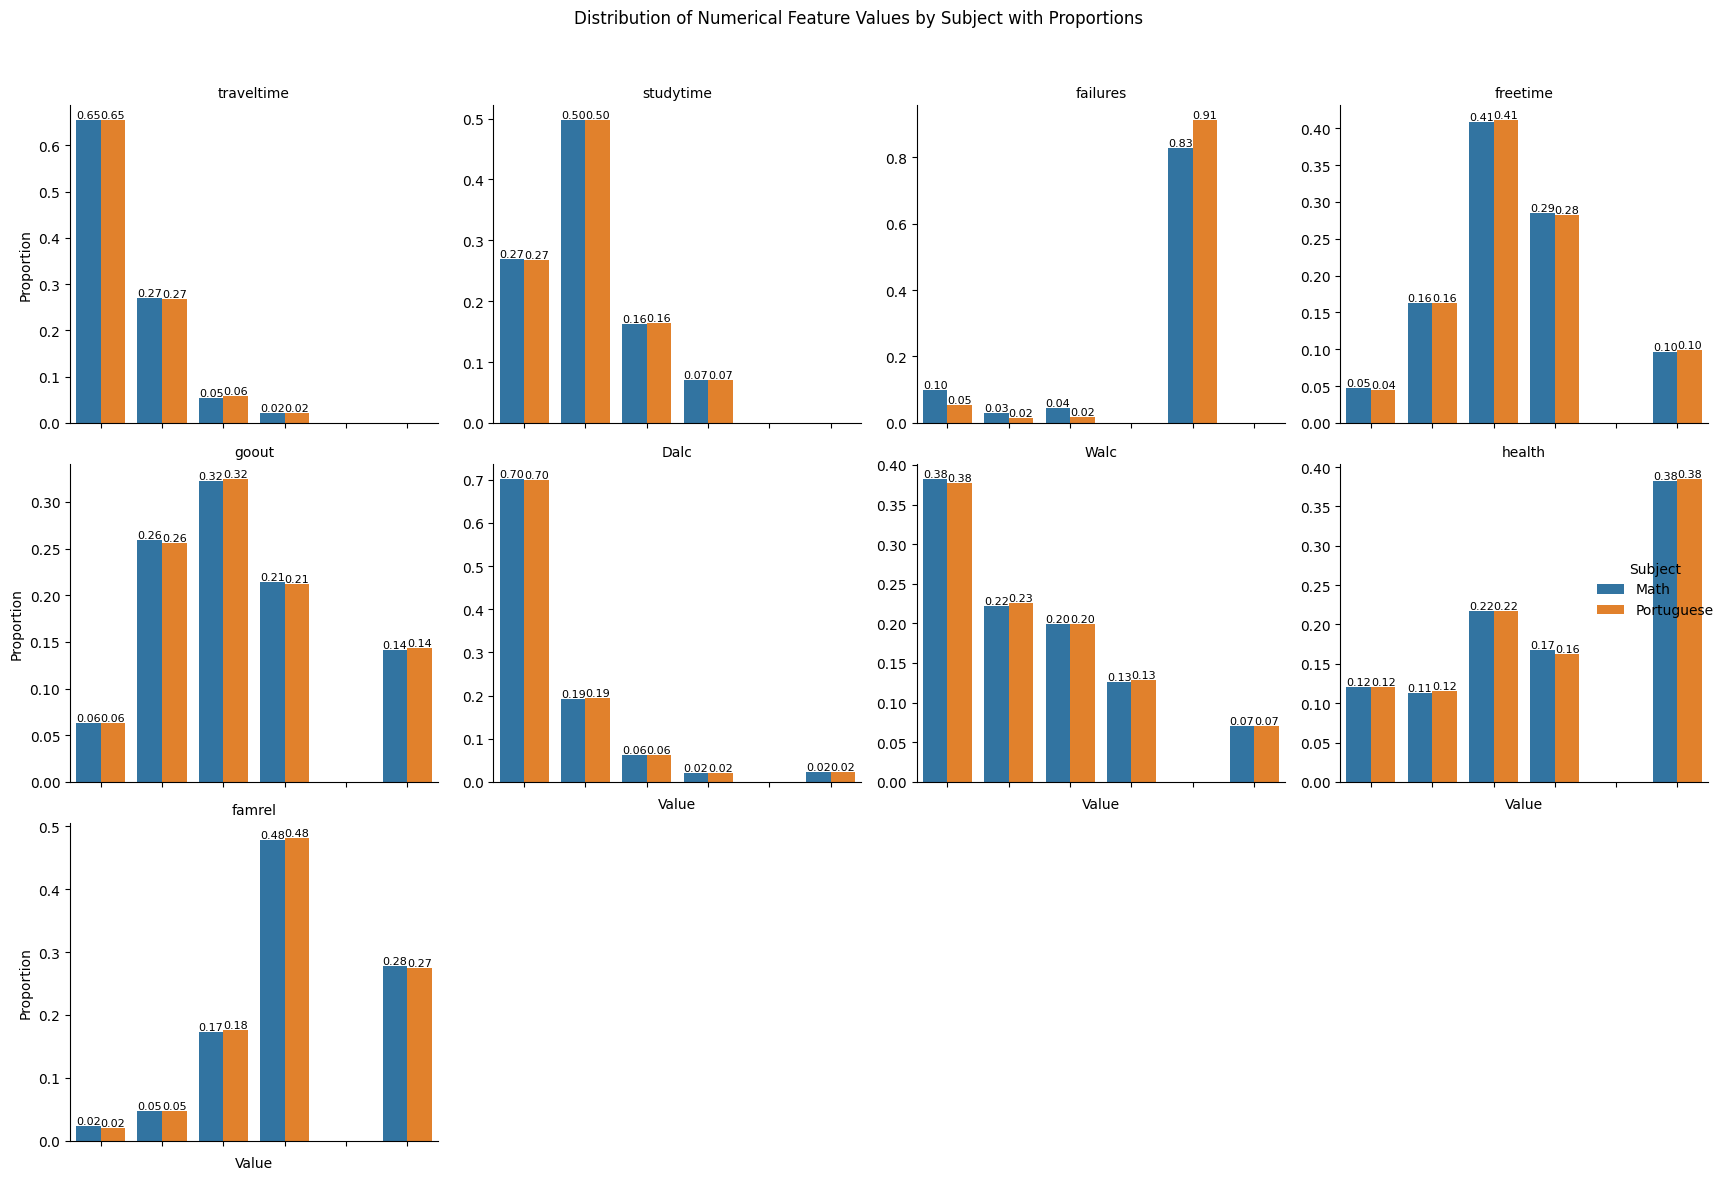

In [14]:
shared_numerical_columns = ["traveltime", "studytime", "failures", "freetime", "goout",
                             "Dalc", "Walc", "health", "famrel"]
# Aggregate value counts for both subject-specific versions
plot_data = []

for col in shared_numerical_columns:
    col_math = f"{col}_math"
    col_por = f"{col}_por"

    if col_math in merged_df.columns and col_por in merged_df.columns:
        math_counts = merged_df[col_math].value_counts(normalize=True)
        por_counts = merged_df[col_por].value_counts(normalize=True)
        #print("******************** Math Columns Distribution******************\n",math_counts)
        #print("******************** Por Columns Distribution******************\n",por_counts)

        for value in set(math_counts.index).union(por_counts.index):
            plot_data.append({
                'Feature': col,
                "Value": f"{value}",
                'Subject': 'Math',
                'Proportion': math_counts.get(value,0)
            })
            plot_data.append({
                'Feature': col,
                "Value": f"{value}",
                'Subject': 'Portuguese',
                'Proportion': por_counts.get(value,0)
            })

# Create DataFrame for plotting
plot_df = pd.DataFrame(plot_data)
print("Feature Values :", plot_df['Value'].unique())


# Plot: Grouped bar plot by value within each feature
g = sns.catplot(
    data=plot_df,
    x="Value", y="Proportion", hue="Subject", col="Feature",
    kind="bar", col_wrap=4, height=4, sharey=False
)

# Annotate each bar with its height (proportion)
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
plt.tight_layout()
for ax in g.axes.flatten():
    for container in ax.containers:
        # Label each bar
        ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=8)

# Add a super title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Numerical Feature Values by Subject with Proportions")

plt.show()

Based on the visual plots comparing **numerical feature distributions** across subjects, we observe the following:

**Identical distributions:**
The features traveltime, studytime, goout, Dalc, and Walc seems to have exactly the same distribution between the Math and Portuguese datasets.

**Nearly identical distributions:**
The features freetime, famrel, and health exhibit very similar distributions, where the differences are actually negligeable.

**Noticeably different distribution:**
The feature fealure shows a significantly different distribution between the two subjects.

### Decision on Handling Similar/Different Feature Columns Distribution

Based on the observations above, we choose the following actions:

#### ***For nominal features***

* guardian, schoolsup, higher →
Keep only one version of each, as they are identical across subjects.

* famsup, activities →
Keep only one version of each. The differences are minimal and these features are not expected to play a central role in academic performance (unlike, for example, absences).

* paid →
Although initially assumed to represent the same information (due to similar values, but different names), the distribution mismatch suggests otherwise. We will remove this feature to avoid confusion or misleading interpretations.



####***For numerical features***

* traveltime, studytime, goout, Dalc, Walc →
Keep only one version of each, as the distributions are identical.

* freetime, famrel, health →
Keep only one version of each. The slight differences are not substantial enough to warrant duplication.

* failures →
Keep both versions, as the distribution difference, which is reasonable as they should provide subject-specific insights.

###  Features Cleanup

Let's build a final cleaned DataFrame that:

**Includes:**
 * All the features you decided to keep (from both nominal and numerical handling).

 * All key student identifiers used in the merge.

 * Both grades (G1, G2, G3) for Math and Portuguese.

 * *texte en italique* The absences feature (for both subjects




In [15]:
# Redefine stable ID columns used during merge
merge_key_columns = [
    "school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"
]

# Define features to keep from previous steps
nominal_to_keep = [
    "guardian_math", "schoolsup_math", "higher_math",
    "famsup_math", "activities_math", "romantic_math"
]

numerical_to_keep = [
    "traveltime_math", "studytime_math", "goout_math",
    "Dalc_math", "Walc_math", "freetime_math", "famrel_math", "health_math"
]

# Failures kept for both subjects as they differ
subject_specific_numerical = ["failures_math", "failures_por"]

# Absences kept for both subjects for completeness
absences_cols = ["absences_math", "absences_por"]

# Grades for both subjects
grades_cols = [
    "G1_math", "G2_math", "G3_math",
    "G1_por", "G2_por", "G3_por"
]

# Combine all to form final column list
final_columns = (
    merge_key_columns +
    nominal_to_keep +
    numerical_to_keep +
    subject_specific_numerical +
    absences_cols +
    grades_cols
)

# Create final cleaned DataFrame
final_cleaned_df = merged_df[final_columns].copy()
print(final_cleaned_df.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian_math', 'schoolsup_math', 'higher_math', 'famsup_math', 'activities_math', 'romantic_math', 'traveltime_math', 'studytime_math', 'goout_math', 'Dalc_math', 'Walc_math', 'freetime_math', 'famrel_math', 'health_math', 'failures_math', 'failures_por', 'absences_math', 'absences_por', 'G1_math', 'G2_math', 'G3_math', 'G1_por', 'G2_por', 'G3_por']


### Features Engineering

#### Grades

To simplify the representation of student performance and reduce dimensionality, we engineered three new features:

1.   math_performance: the average of the Math grades
(G1_math, G2_math, G3_math)

2.   por_performance: the average of the Portuguese grades (G1_por, G2_por, G3_por)

3.   global_performance: the overall academic average, calculated as the mean of math_performance and por_performance

These new features summarize a student's overall achievement in each subject, which will represent our target as a stable and interpretable indicator of academic performance.



In [16]:
# Calculate average performance for Math
final_cleaned_df["math_performance"] = final_cleaned_df[["G1_math", "G2_math", "G3_math"]].mean(axis=1)

# Calculate average performance for Portuguese
final_cleaned_df["por_performance"] = final_cleaned_df[["G1_por", "G2_por", "G3_por"]].mean(axis=1)

# Generate a new feature that represents the global average performance
final_cleaned_df["global_performance"] = final_cleaned_df[["math_performance", "por_performance"]].mean(axis=1)

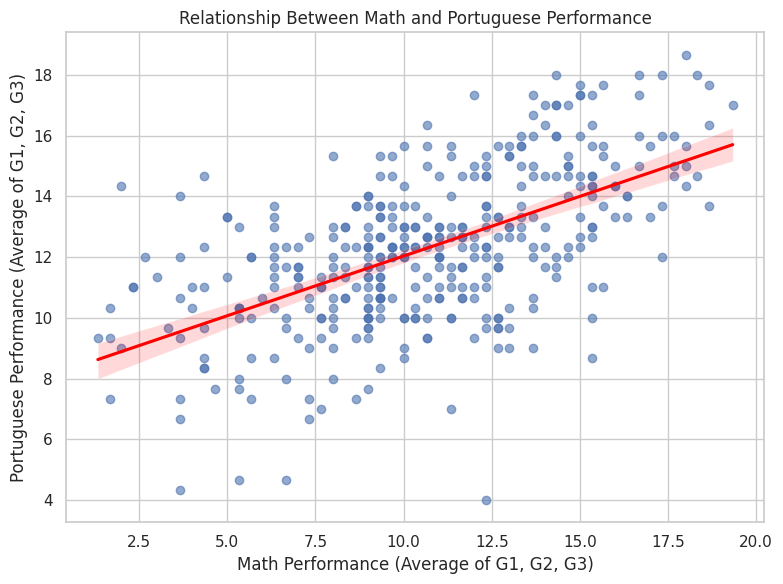

In [17]:

# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
# Add a red regression line to visualize the linear trend
plt.figure(figsize=(8, 6))
sns.regplot(
    data=final_cleaned_df,
    x="math_performance",
    y="por_performance",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"},
)

# Add labels and title
plt.xlabel("Math Performance (Average of G1, G2, G3)")
plt.ylabel("Portuguese Performance (Average of G1, G2, G3)")
plt.title("Relationship Between Math and Portuguese Performance")

plt.tight_layout()
plt.show()

We can now optionally drop the original grade columns after computing their averages, as they are now represented in the new features.

In [18]:
#final_cleaned_df.drop(columns=["G1_math", "G2_math", "G3_math", "G1_por", "G2_por", "G3_por"], inplace=True)


In [19]:
final_cleaned_df["math_performance"].median()

10.666666666666666

In [20]:
final_cleaned_df["por_performance"].median()

12.333333333333334

In [21]:
final_cleaned_df["global_performance"].median()

11.333333333333332

#### Absences

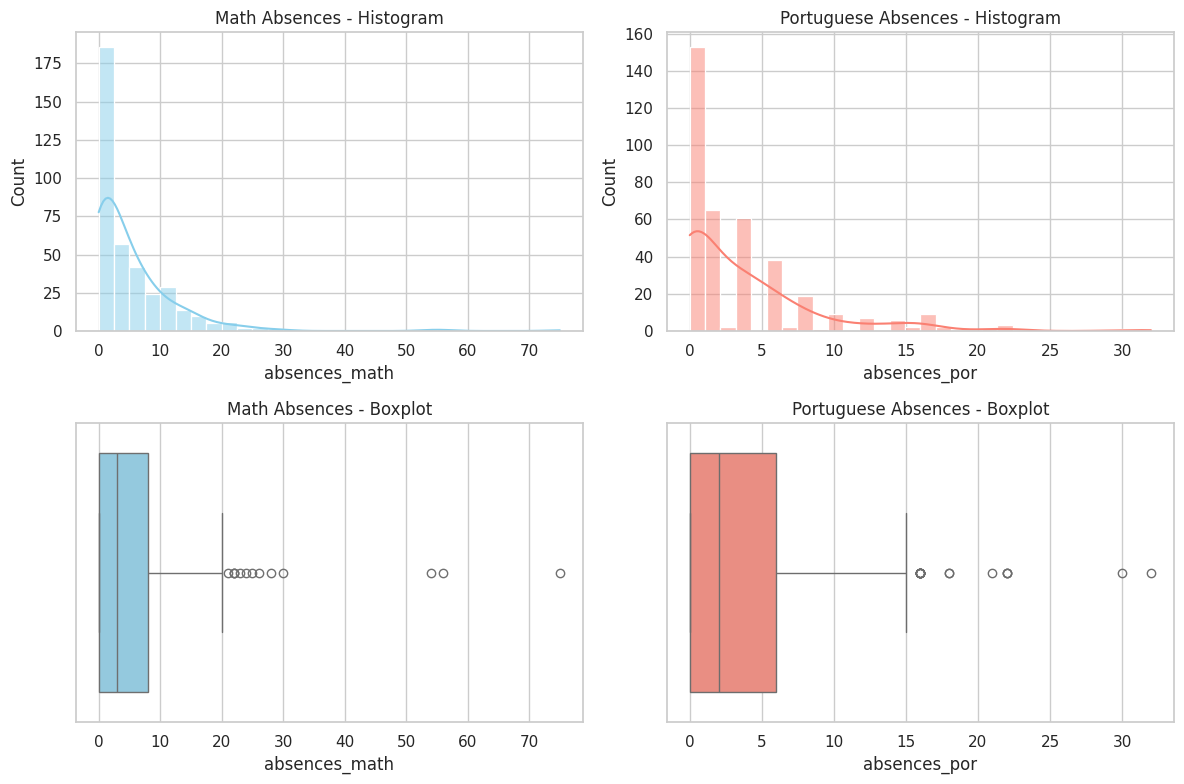

In [22]:
# Set figure style
sns.set(style="whitegrid")

# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Math absences
sns.histplot(final_cleaned_df["absences_math"], kde=True, bins=30, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Math Absences - Histogram")

# Portuguese absences
sns.histplot(final_cleaned_df["absences_por"], kde=True, bins=30, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title("Portuguese Absences - Histogram")

# Boxplot Math
sns.boxplot(x=final_cleaned_df["absences_math"], ax=axes[1, 0], color="skyblue")
axes[1, 0].set_title("Math Absences - Boxplot")

# Boxplot Portuguese
sns.boxplot(x=final_cleaned_df["absences_por"], ax=axes[1, 1], color="salmon")
axes[1, 1].set_title("Portuguese Absences - Boxplot")

plt.tight_layout()
plt.show()

Based on observed distribution of the absences feature (in both dataset), a simple binning strategy could be:

1. 0: No absences

2. 1–5: Low

3. 6–15: Moderate

4. 16+: High

In [23]:
# Define bins and labels
absence_bins = [0, 0.5, 5, 15, final_cleaned_df[["absences_math", "absences_por"]].max().max()]
absence_labels = ["None", "Low", "Moderate", "High"]

# Create binned features
final_cleaned_df["absences_math_level"] = pd.cut(final_cleaned_df["absences_math"], bins=absence_bins, labels=absence_labels, include_lowest=True)
final_cleaned_df["absences_por_level"] = pd.cut(final_cleaned_df["absences_por"], bins=absence_bins, labels=absence_labels, include_lowest=True)

The list [0, 0.5, 5, 15, max_value] defines four bins:

1. 0 to 0.5 → Captures students with zero absences (just 0).
Since 0 is the minimum possible value, and no one has 0.3 absences, this ensures zero gets its own category.

2. 0.5 to 5 → Absence values from 1 to 5 (i.e., low number of absences).

3. 5 to 15 → Captures moderate absence counts.

4. 15 to max_value → Anything above 15 (i.e., high absence).

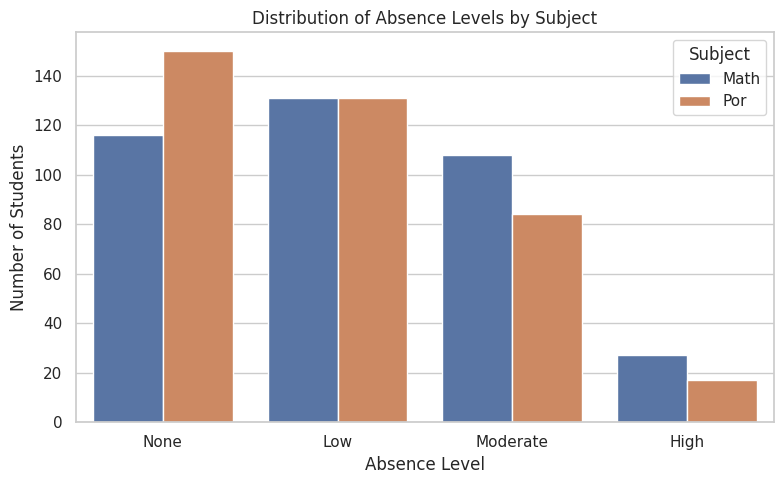

In [24]:
# Prepare data for plotting
plot_absence_levels = final_cleaned_df.melt(
    value_vars=["absences_math_level", "absences_por_level"],
    var_name="Subject",
    value_name="Absence_Level"
)

# Rename for clarity
plot_absence_levels["Subject"] = plot_absence_levels["Subject"].str.replace("absences_", "").str.replace("_level", "").str.capitalize()

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=plot_absence_levels, x="Absence_Level", hue="Subject")
plt.title("Distribution of Absence Levels by Subject")
plt.xlabel("Absence Level")
plt.ylabel("Number of Students")
plt.legend(title="Subject")
plt.tight_layout()
plt.show()

We can now remove the original numeric absence columns after binning if we want




In [25]:
#final_cleaned_df.drop(columns=["absences_math"], inplace=True)
#final_cleaned_df.drop(columns=["absences_por"], inplace=True)

#### Data *Analysis*

To properly analyze and prepare the merged dataset for modeling, it's essential to classify the features into meaningful classes based on their nature and semantics.

This structure also guides correlation analysis and encoding strategies later.


For each of the following *Feature Classes*, we will follow the same approach of analysis.
1. First, we will visualise the distribution of each feature using a pertinent plot type (categorical/numerical).
    * count plots can perfectly visualize categorical features distribution
    * histogram and KDE curve show better the distribution of numerical ones
2. Then, we will be inspecting each one to see if there is a remarquable correlation with our target feature, using the the most appropriate plot type.

    *   boxplots are ideal for categorical features
    *   scatter plot or regression plot is more suitable for numerical feature



##### ***1.Student Identity (Stable Identifiers)***
 These features uniquely identify a student.

  * school — school name

  * sex — gender

  * age — age in years

  * address — urban vs. rural

  * famsize — family size

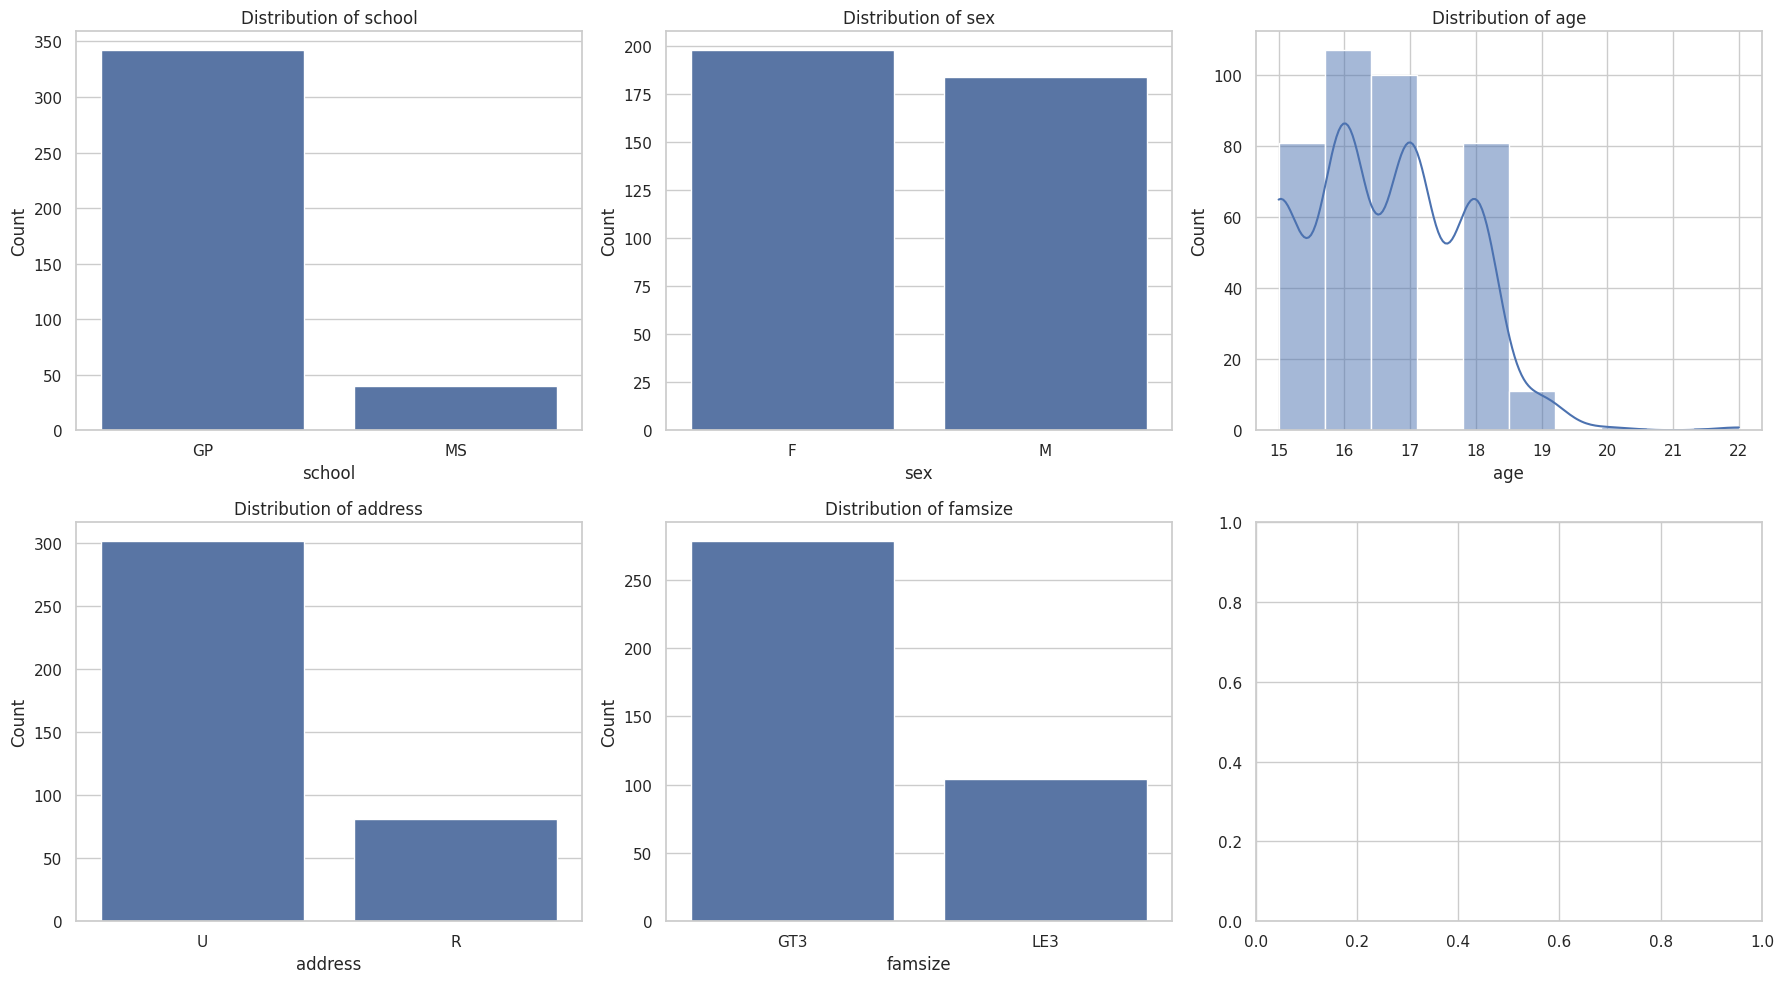

In [26]:
identity_features = ['school', 'sex', 'age', 'address', 'famsize']

# Set up the figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot categorical features using countplot, and age with histogram
for i, col in enumerate(identity_features):
    ax = axes[i]
    if final_cleaned_df[col].dtype  == 'object':
        sns.countplot(data=final_cleaned_df, x=col, ax=ax)
    else:
        sns.histplot(data=final_cleaned_df, x=col, kde=True, bins=10, ax=ax) # for Age
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

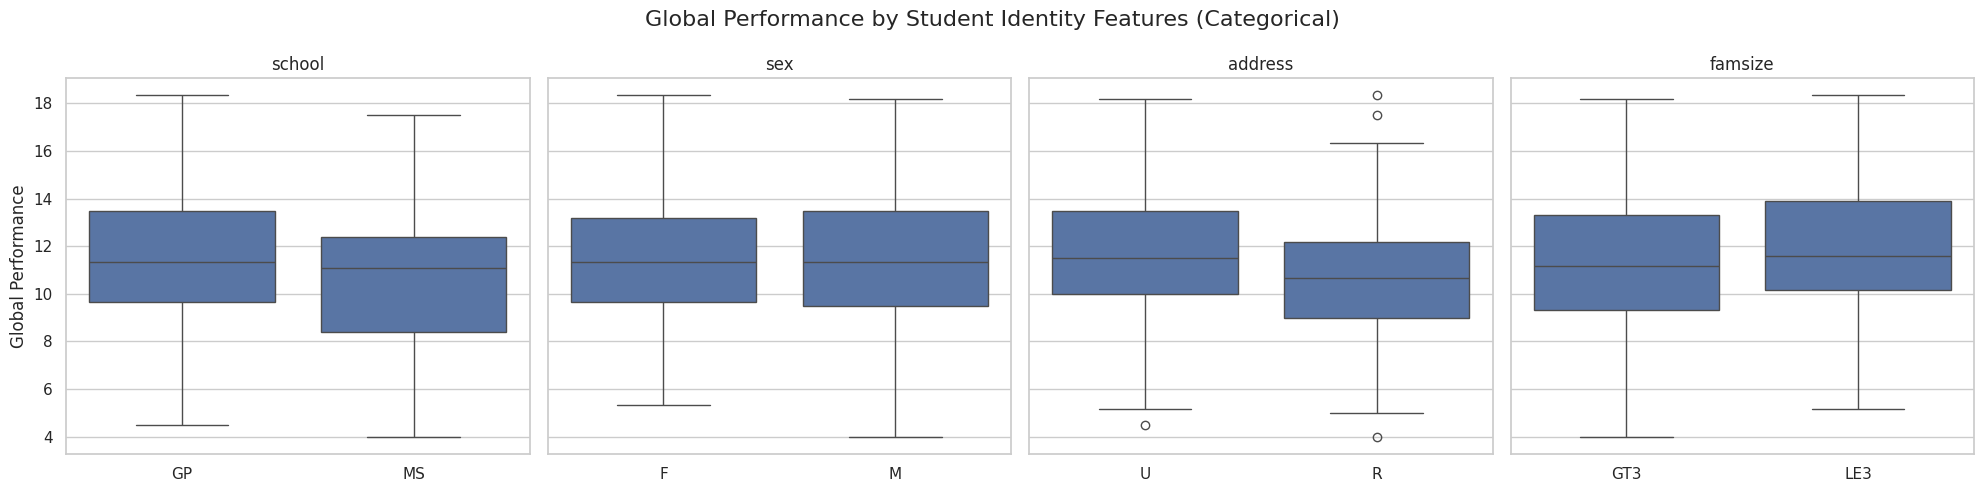

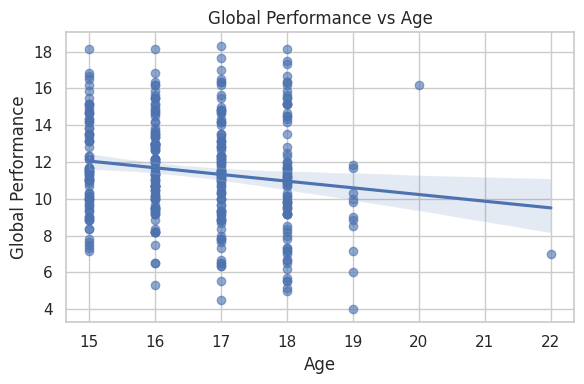

In [27]:
# List of categorical identity features
categorical_identity_features = categorical_features = ["school", "sex", "address", "famsize"]


# Create subplots for categorical features (1 row, len(columns) cols)
fig, axes = plt.subplots(1, len(categorical_identity_features), figsize=(5 * len(categorical_identity_features), 5), sharey=True)

for i, col in enumerate(categorical_features):
    sns.boxplot(x=final_cleaned_df[col], y=final_cleaned_df["global_performance"], ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel('')
    if i == 0:
        axes[i].set_ylabel("Global Performance")
    else:
        axes[i].set_ylabel("")

fig.suptitle("Global Performance by Student Identity Features (Categorical)", fontsize=16)
plt.tight_layout()
plt.show()

# Create a separate figure for age vs performance
plt.figure(figsize=(6, 4))
sns.regplot(x="age", y="global_performance", data=final_cleaned_df, scatter_kws={'alpha':0.6})
plt.title("Global Performance vs Age")
plt.xlabel("Age")
plt.ylabel("Global Performance")
plt.tight_layout()
plt.show()


**Interpretation**

 1. school
  * Distribution: Strong imbalance – most students are from GP.
  * Performance Insight : GP students seem to have a slightly higher median global performance and a slightly wider upper range than MS students.
  * Decision: the sample is skewed, so we need to be cautious when generalizing performance conclusions by school. As we are not interessted to compare performance across schools, and technically, sampling techniques may not be beneficial in this context, we might rather not include this identity attribute.

2. sex
  * Distribution: Almost equal numbers of F and M.
  * Performance: The meadian is nearly identical, with a very similar distribution shape.
  * Decision: we might drop sex as apparently it adds no predictive power in modeling.
  
3. address
  * Distribution: Majority of students are urban (U).
  * Performance Insight: Urban students perform slightly better (tend to have slightly better median and upper-quartile performance), but the difference is not striking.
  * Decision: Might be weakly predictive. Could be combined with other features to create a compisite one.

4. famsize
  * Distribution: Most students are from larger families (GT3).
  * Performance Insight: overall the distributions are quite similar, so it has minor or negligible effect on performance.
  * Decision: Feature seems uninformative, but may interact with other socioeconomic variables.

5. age
  * Distribution: Majority of students are between 15 and 18 years old, with a long tail extending to 22.
  * Performance Insight: here's a slight negative correlation between age and global performance. The regression line confirms that older students tend to perform worse on average.

      Older students might reflect students who repeated grades or had disrupted academic progress, leading to lower outcomes. Alternatively, the older they are the more they have external responsibilities.
  * Decision: Keep this numerical feature. Consider binning into: ≤16 (typical), 17–18 (transitional), >18



##### ***2.Sociodemographic & Environment***
These reflect the socioeconomic and educational environment of the student. They could be used to detect inequality or access gaps.

  * Medu, Fedu — mother/father's education level

  * Mjob, Fjob — mother/father's job

  * guardian — legal guardian

  * Pstatus — parent's cohabitation status

  * internet — internet access at home

  * nursery — attended nursery school


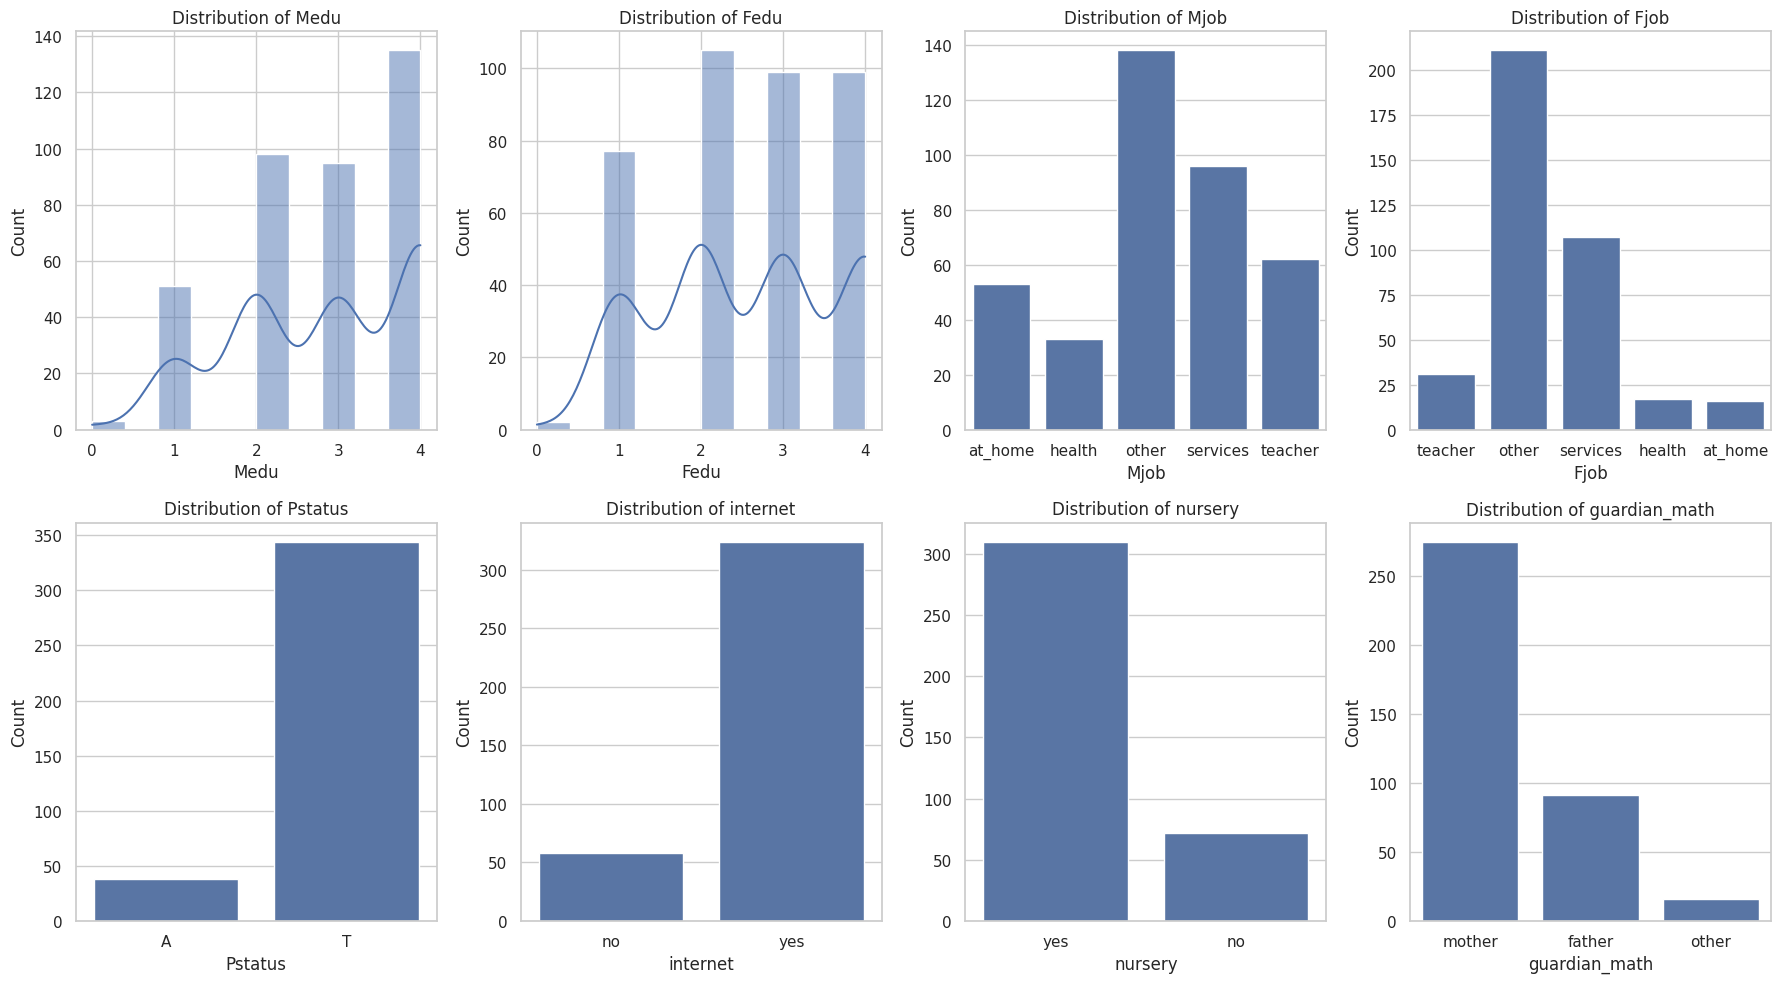

In [28]:

# Features to plot


identity_features = ["Medu", "Fedu", "Mjob", "Fjob", "Pstatus", "internet", "nursery", "guardian_math"]

# Set up the figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()

# Plot categorical features using countplot, and age with histogram
for i, col in enumerate(identity_features):
    ax = axes[i]
    if final_cleaned_df[col].dtype  == 'object':
        sns.countplot(data=final_cleaned_df, x=col, ax=ax)
    else:
        sns.histplot(data=final_cleaned_df, x=col, kde=True, bins=10, ax=ax) # for Age
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

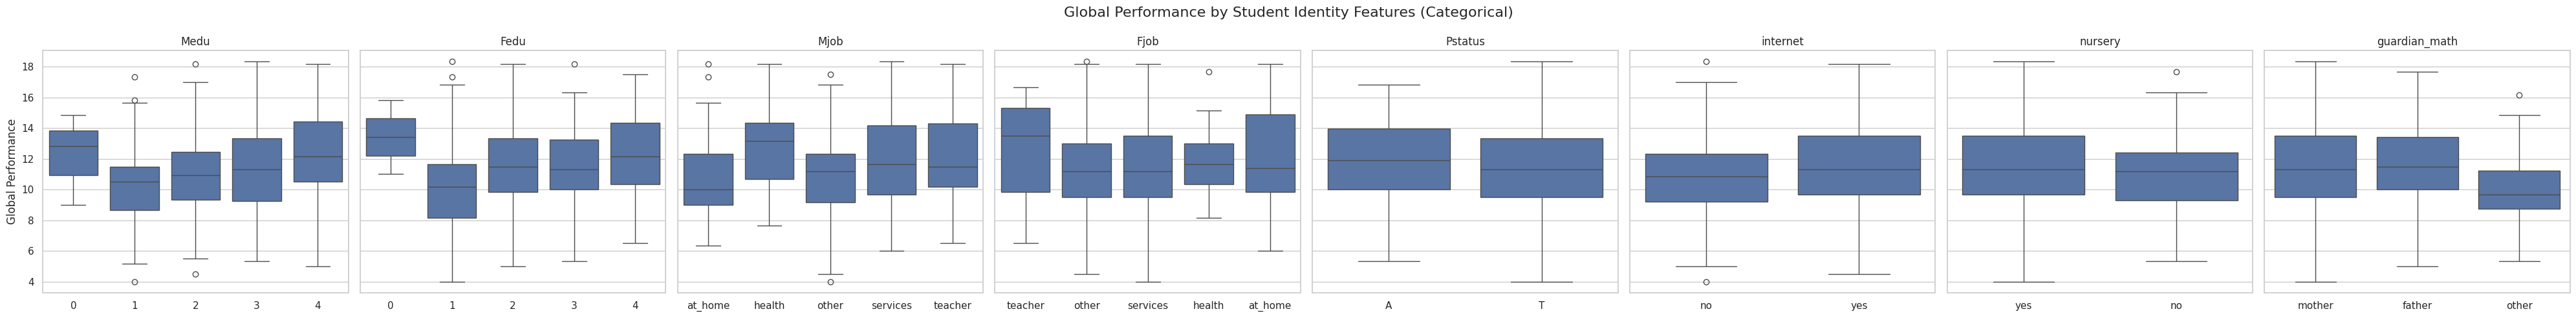

In [29]:
# List of categorical identity features
categorical_identity_features = categorical_features = ["Medu", "Fedu", "Mjob", "Fjob", "Pstatus", "internet", "nursery", "guardian_math"]


# Create subplots for categorical features (1 row, len(columns) cols)
fig, axes = plt.subplots(1, len(categorical_identity_features), figsize=(5 * len(categorical_identity_features), 5), sharey=True)

for i, col in enumerate(categorical_features):
    sns.boxplot(x=final_cleaned_df[col], y=final_cleaned_df["global_performance"], ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel('')
    if i == 0:
        axes[i].set_ylabel("Global Performance")
    else:
        axes[i].set_ylabel("")

fig.suptitle("Global Performance by Student Identity Features (Categorical)", fontsize=16)
plt.tight_layout()
plt.show()

**Interpretation**

 1. Mother Job
  * Distribution: shows varied spreads and medians, with "health" being the most consistently high-performing and "at_home" the lowest and most consistent in underperformance.
  * Performance Insight : Students whose mothers work in health tend to perform better, while those whose mothers stay at home show lower academic performance.
  * Decision: keep, as it provides non-random patterns and helps differentiate student outcomes. we also might hot encode.

2. Father Job
  * Distribution: how similar spreads, with some outliers and wider IQRs in services and other.
  * Performance: Only teacher stands out with a higher median; other categories overlap heavily.
  * Decision: Keep for now, but its predictive power may be limited, consider testing feature importance later.
  
3. Mother Education & Father Education
  * Distribution:Both distributions show similar spread and interquartile ranges, The median tends to increase with higher education levels.
  * Performance Insight: As parental education increases, student performance tends to improve
  * Decision:  we could consider choosing just one of them for inclusion in a model to reduce redundancy

5. Nursery
  * Distribution: Both show a wide range, indicating considerable variability in performance regardless of nursery attendance.
  * Performance Insight: the overlap in interquartile ranges suggests that the effect is not substantial or definitiv
  * Decision: While nursery attendance may offer a slight benefit in median performance, the boxplot indicates that it is not a strong predictor on its own, we can just drop it

6. Internet
  * Distribution: clear split between users with internet access (yes) and those without (no).
  * Performance Insight:  Users with internet access may experience better performance compared to those without.
  * Decision: while not very informative, we keep it


  6. Guardian
  * Distribution: The guardians are distributed among mother, father, and other categories, with mother and father being the most common.
  * Performance Insight:  Students with "mother" or "father" as guardians may show similar academic trends, while "other" guardians could exhibit different patterns.

     
  * Decision:combine mother and father to be parent, and keep the feature


  7. Pstatus
  * Decision: remove the feature


#####  **3. Academic Engagement & Study Habits**
 These describe how the student engages with their studies, which are behavioral and can change over time.


  * studytime — weekly study time

  * traveltime — daily travel time to school

  * failures — number of past class failures

  * absences_math / absences_por — school absences

  * absences_math_level / absences_por_level — binned version

We'll start by:

*   Visualizing the distributions of each feature.
*   Exploring their relationship with global_performance using appropriate plots.
*   Providing interpretation and decisions after.

['traveltime_math', 'studytime_math', 'failures_math', 'failures_por', 'absences_math', 'absences_por', 'absences_math_level', 'absences_por_level']


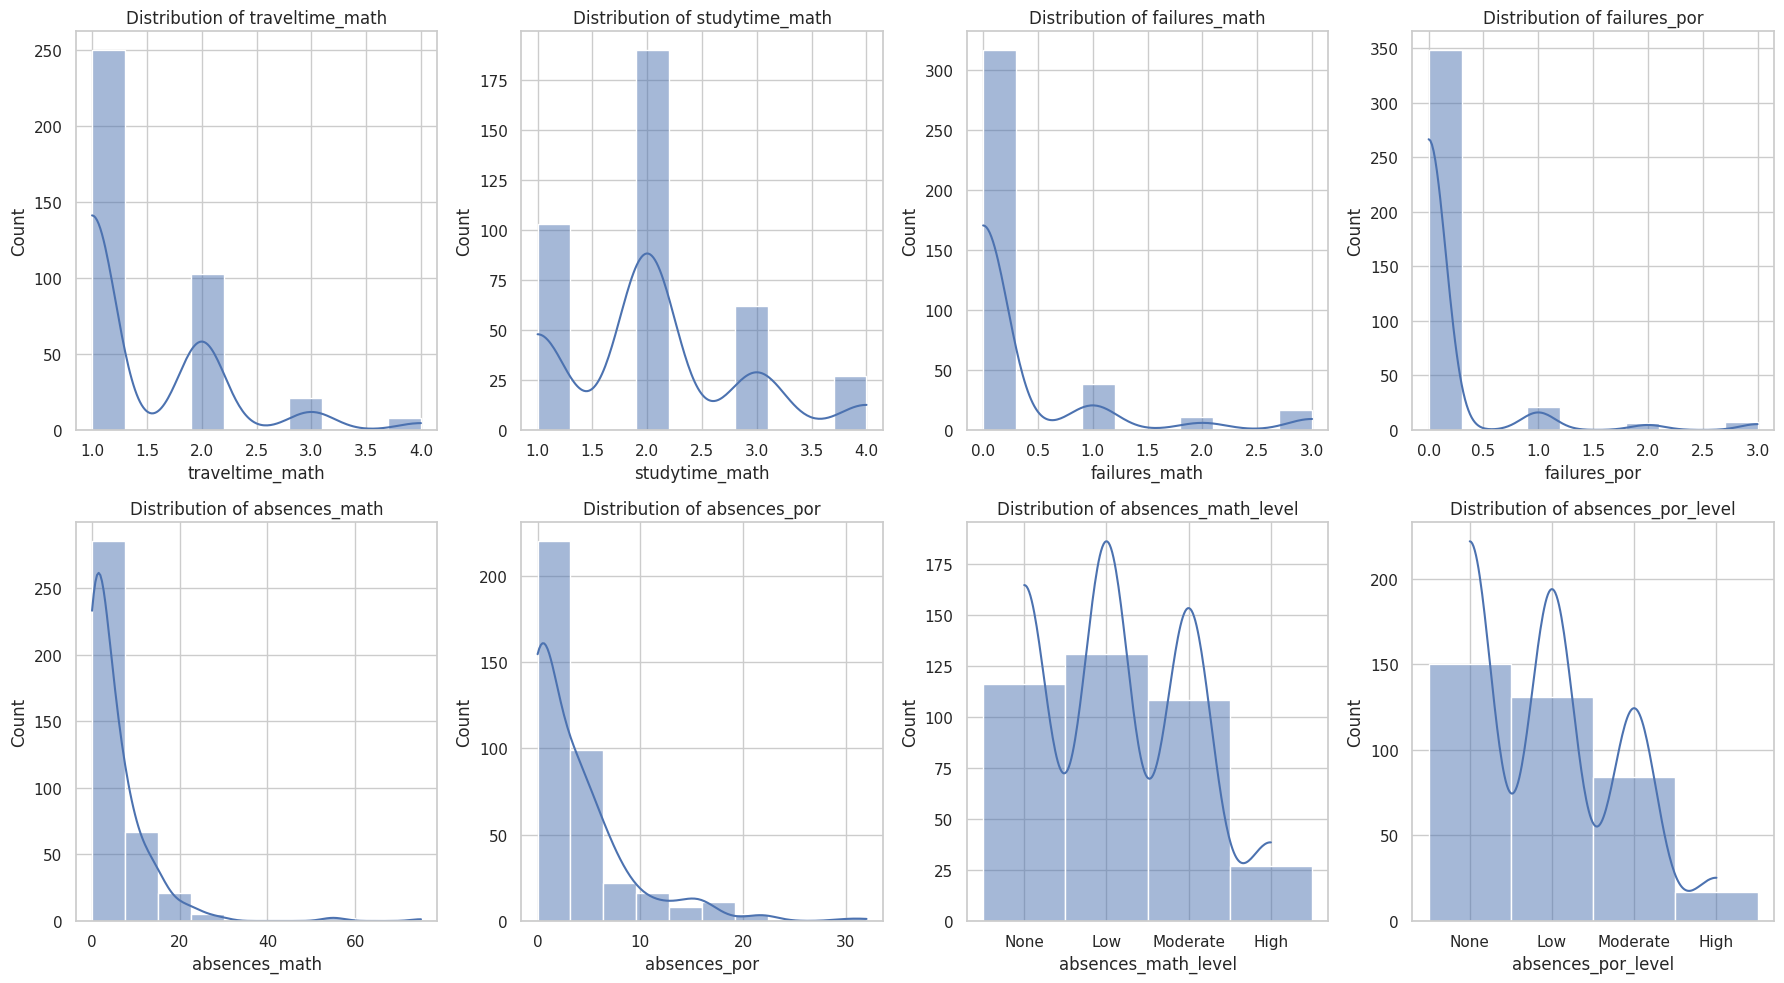

In [30]:

# Features to plot
academic_root_features = ["studytime_", "traveltime", "failures", "absences"]
# Extract matching columns from final_cleaned_df
academic_features = [
    col for col in final_cleaned_df.columns
    if any(root in col for root in academic_root_features)
]

print(academic_features)

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axs = axs.flatten()

for i, feature in enumerate(academic_features):
    if final_cleaned_df[feature].dtype  == 'object':
        sns.countplot(data=final_cleaned_df, x=feature, ax=ax)
    else:
        sns.histplot(data=final_cleaned_df, x=feature, kde=True, bins=10, ax=axs[i])
    axs[i].set_title(f"Distribution of {feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Count")

# Remove unused subplot if needed


plt.tight_layout()
plt.show()

['traveltime_math', 'studytime_math', 'failures_math', 'failures_por']


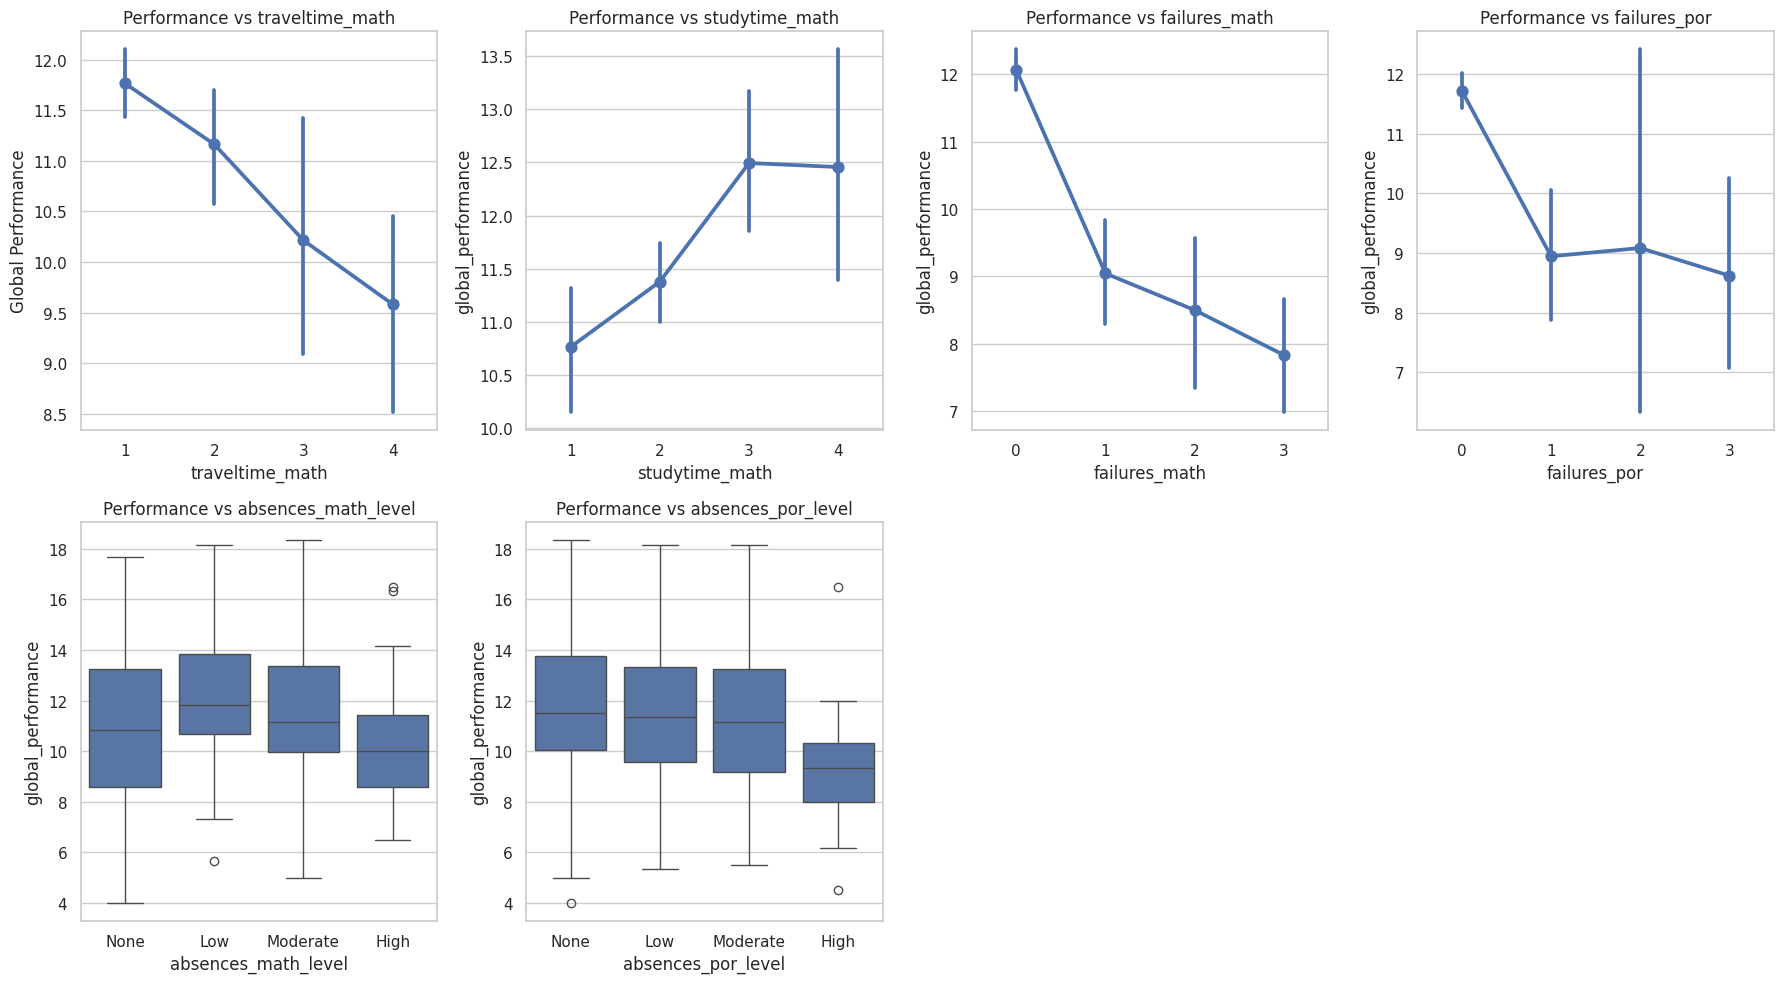

In [31]:
categorical_academic_features = ["absences_math_level", "absences_por_level"]
ordinal_num_academic_features = [
    col for col in academic_features if col not in categorical_academic_features and
    col not in ["absences_math", "absences_por"]
]
print(ordinal_num_academic_features)
academic_features = ordinal_num_academic_features + categorical_academic_features
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axs = axs.flatten()

for i, feature in enumerate(academic_features):
    if feature in ordinal_num_academic_features:
      # here we can use boxplot as we did before,
      # but for diversivided experementation we prefered to try pointplot
      sns.pointplot(data=final_cleaned_df, x=feature, y="global_performance", ax=axs[i])
    elif feature in categorical_academic_features:
      sns.boxplot(data=final_cleaned_df, x=feature, y="global_performance", ax=axs[i])
    axs[i].set_title(f"Performance vs {feature}")
    axs[i].set_xlabel(feature)
    if i == 0:
      axs[i].set_ylabel("Global Performance")


# Remove extra subplot (if any)
if len(academic_features) < len(axs):
    for j in range(len(academic_features), len(axs)):
        fig.delaxes(axs[j])


plt.tight_layout()
plt.show()

**Interpretation**


  1. traveltime
    * Distribution: The majority of students fall into class 1 (less than 15 minutes), which is typical and expected.

    * Performance Insight: A clear negative correlation is observed — students who live closer to school tend to perform better.

    * Decision: Retain as-is for further (analysis) and modeling.



  2. studytime
    * Distribution: The distribution is skewed, with most students in class 2 (2 to 5 hours). Notably, the number of students dedicating >10 hours weekly (class 4) is roughly one-third of those in class 1 (< 2 hours).

    * Performance Insight : There is a noticeable positive correlation with global performance. Classes 3 (5–10 hours) and 4 (>10 hours) have similar median performance.

    * Decision: Keep as-is, or consider regrouping class 4 into class 3,as they have nearly the same median, to reduce sparsity

  
 3. failure_math & failur_po
    * Distribution: Both features exhibit similar shapes and distributions.

    * Performance Insight : Strong negative correlation with performance — more failures are associated with lower global scores.

    * Decision: Create a new combined feature by summing the two and re-encoding it: ( n if 1<=n < 3, else 4), This results in a more compact yet informative feature for *to_be_used_features*.

4. absences_math_level & absences_por_level
    * Distribution : Nearly identical distributions, with the majority of students reporting no absences or low levels (1–5).

    * Performance Insight : Weak predictive value with the current binning; median performance across bins shows little variation, especially for Portuguese.

    * Decision : Combine the raw absences_math and absences_por into a new feature absences. Then re-bin into three intervals: (Low (0-4 absences), Moderate(5-15), High(>15)). This may offer better performance differentiation.

##### ***4. Academic Motivation & Support***
These express future intent or direct support. These features capture student ambition and external academic assistance.

  * higher — intention to pursue higher education

  * schoolsup — extra educational support from the school

  * famsup — family educational support

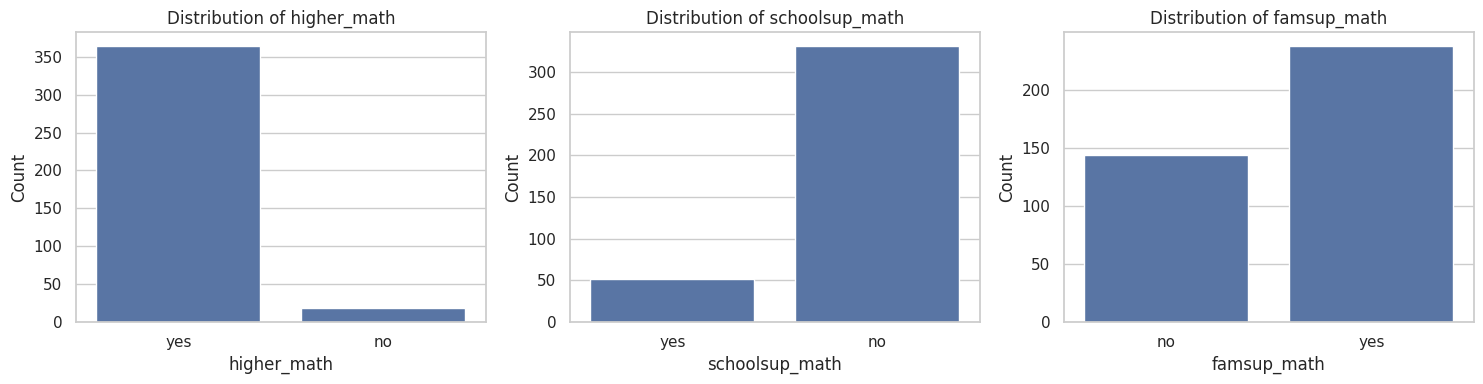

In [32]:
binary_motivation_features = ["higher_math", "schoolsup_math", "famsup_math"]

plt.figure(figsize=(15, 4))
for i, feature in enumerate(binary_motivation_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=final_cleaned_df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


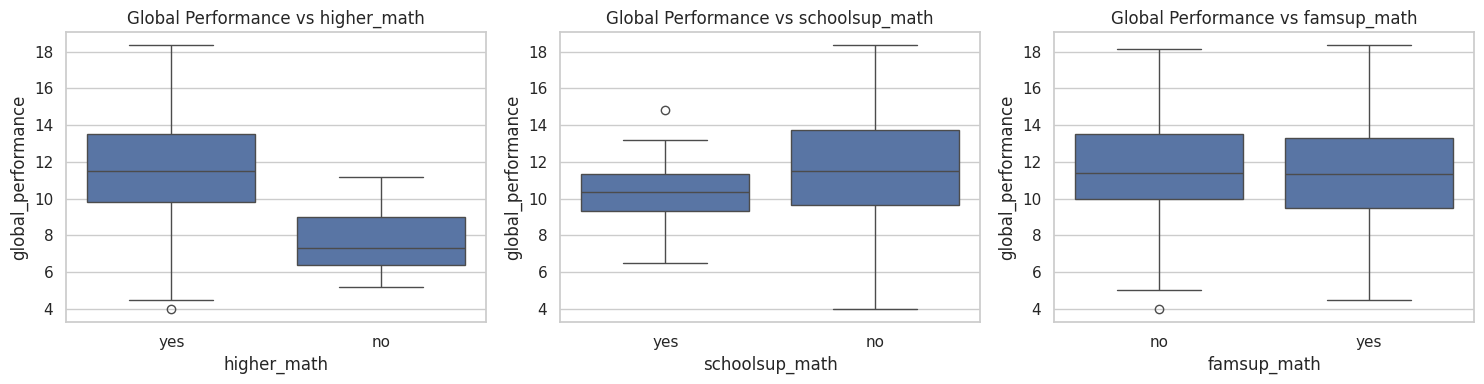

In [33]:
plt.figure(figsize=(15, 4))
for i, feature in enumerate(binary_motivation_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=final_cleaned_df[feature], y=final_cleaned_df["global_performance"])
    plt.title(f'Global Performance vs {feature}')
plt.tight_layout()
plt.show()

**Interpretation**

1. higher
    * Distribution: Very skewed distribution (+350 yes vs  < 25 no) indicates a strong majority with aspirations for higher education.
    * Performance Insight : Despite the class imbalance, the motivation to continue studying is likely positively correlated with academic performance.
    * Decision: Retain and encode as binary (1 for 'yes', 0 for 'no'). ( class unbalance techniques to be considered if really affects the model)

2. schoolarsup
    * Distribution: Most students do not receive extra school support.
    * Performance Insight : Students with "yes" to schoolsup do not show better performance on average. It may indicate that students receiving support are those already struggling !
    * Decision: Keep with caution or drop.

3. famsup
    * Distribution: More balanced than others (+250 yes vs < 140 no). Indicates a fair variance in family support across the student population.
    * Performance Insight : Performance medians between "yes" and "no" students are very similar, suggesting little to no direct predictive value on their own.
    * Decision: Drop it or integrate it into a composite support index.

#####  ***5. Social & Personal Life***
Lifestyle, relationships, and peer engagement. May have indirect effects on performance via time management, emotional support, or distraction.

  * activities — extracurricular activities

  * romantic — in a romantic relationship

  * goout — going out with friends

  * freetime — free time after school

  * famrel — quality of family relationships

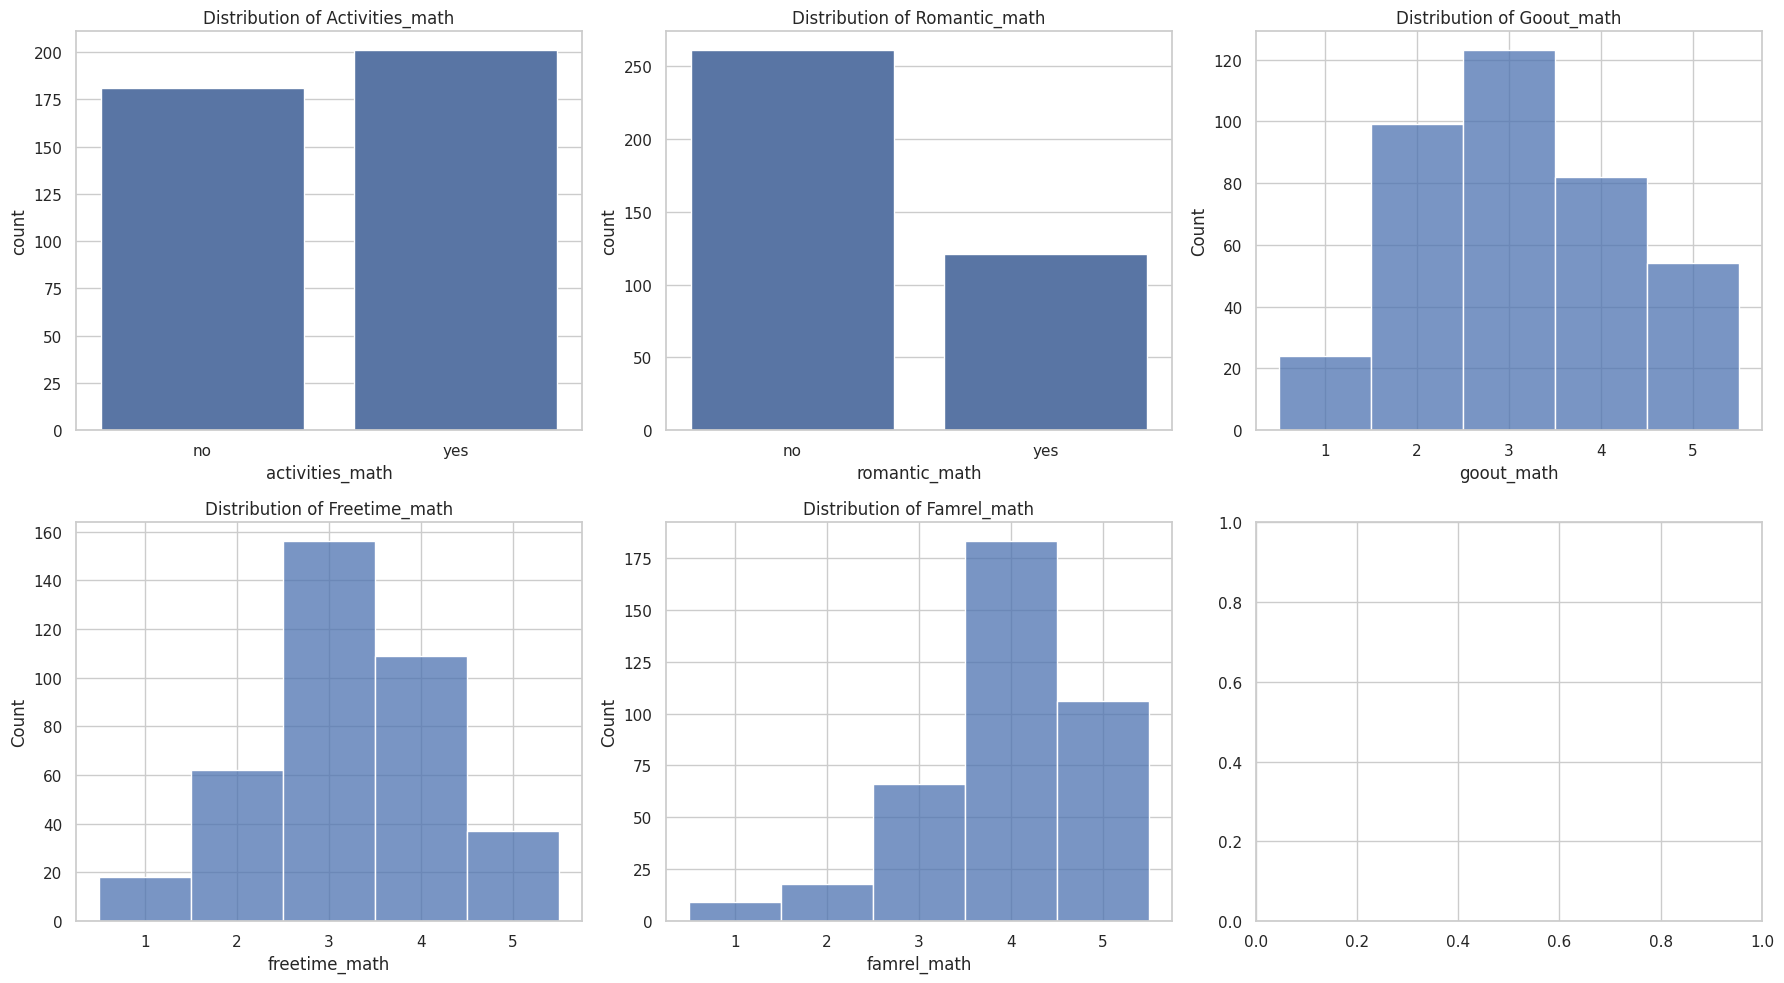

In [34]:

# Define lists
categorical_chi_features = ["activities_math", "romantic_math"]  # binary (yes/no)
ordinal_chi_features = ["goout_math", "freetime_math", "famrel_math"] # scale from 1 to 5

social_features = categorical_chi_features + ordinal_chi_features

# Set style
sns.set(style="whitegrid")

# Initialize subplot grid: total features = 5 → 5 rows, 2 cols (dist + performance)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axs = axs.flatten()

# Plot
for i, feature in enumerate(social_features):
    if feature in categorical_chi_features:
        sns.countplot(data=final_cleaned_df, x=feature, ax=axs[i])
        axs[i].set_title(f"Distribution of {feature.capitalize()}")


    elif feature in ordinal_chi_features:
        sns.histplot(data=final_cleaned_df, x=feature, bins=5, discrete=True, kde=False, ax=axs[i])
        axs[i].set_title(f"Distribution of {feature.capitalize()}")


# Layout
plt.tight_layout()
plt.show()

['goout_math', 'freetime_math', 'famrel_math']


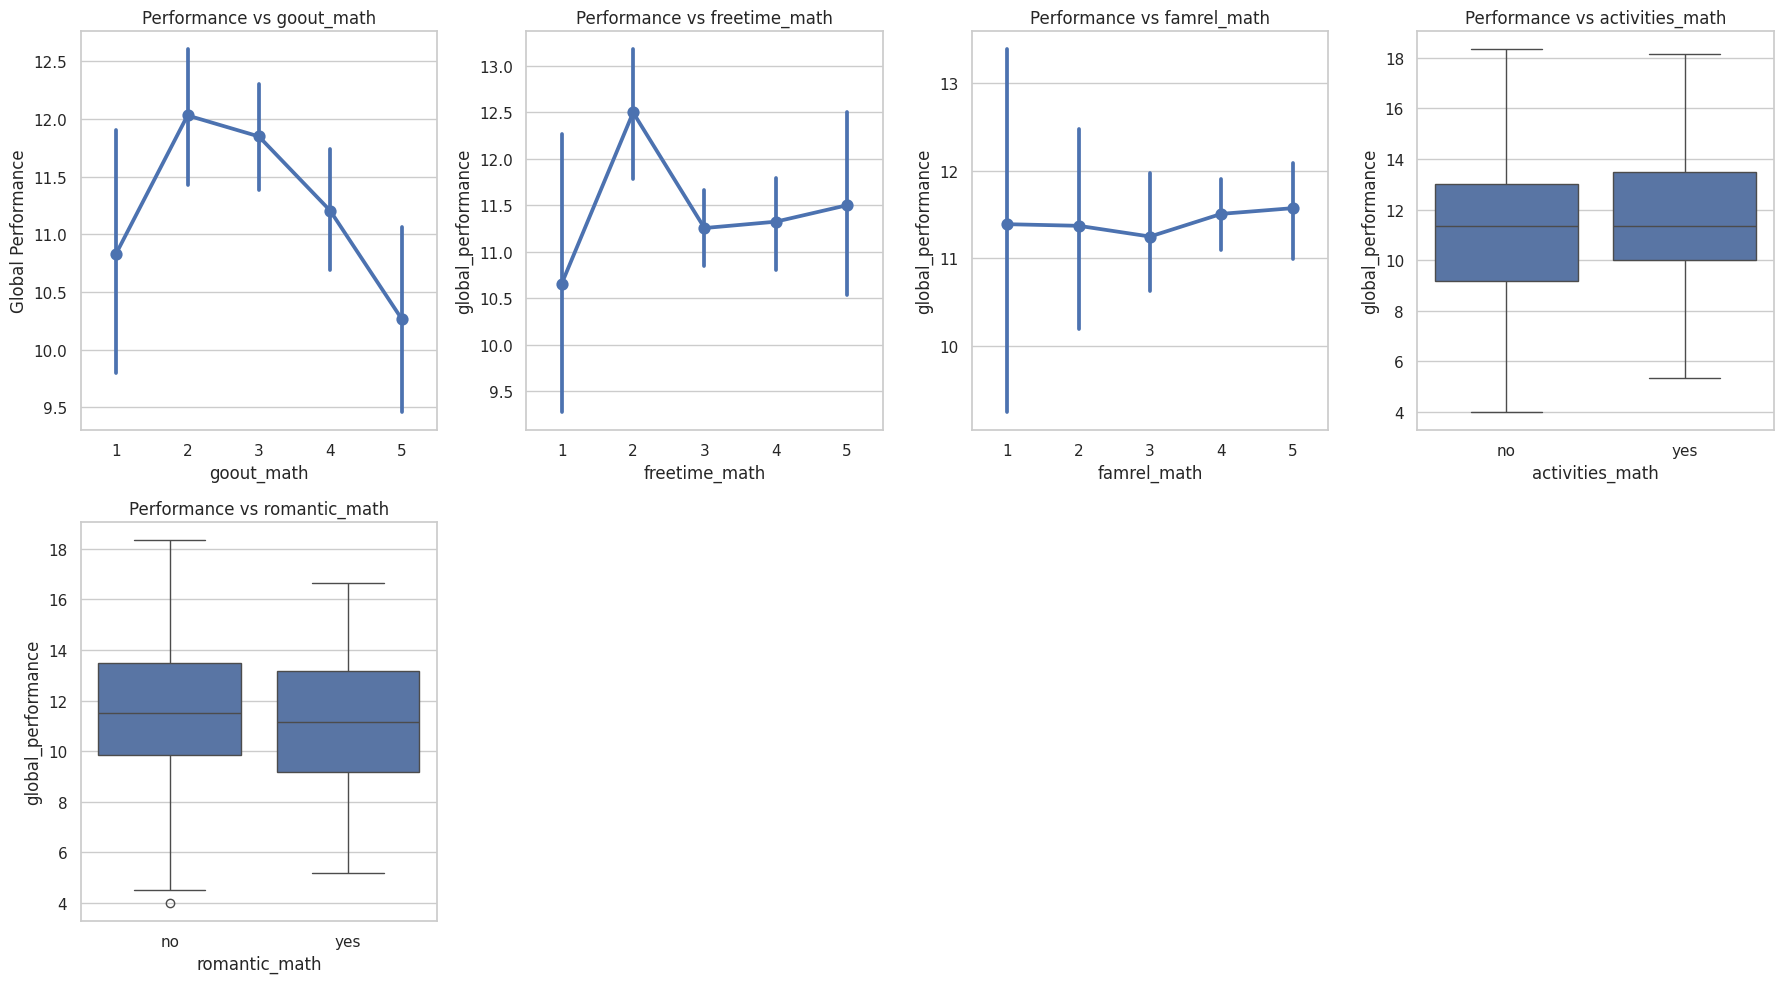

In [35]:
categorical_social_features = ["activities_math", "romantic_math"]
ordinal_num_social_features =  ["goout_math", "freetime_math", "famrel_math"]

print(ordinal_num_social_features)
social_features = ordinal_num_social_features + categorical_social_features
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axs = axs.flatten()

for i, feature in enumerate(social_features):
    if feature in ordinal_num_social_features:
      # here we can use boxplot as we did before,
      # but for diversivided experementation we prefered to try pointplot
      sns.pointplot(data=final_cleaned_df, x=feature, y="global_performance", ax=axs[i])
    elif feature in categorical_social_features:
      sns.boxplot(data=final_cleaned_df, x=feature, y="global_performance", ax=axs[i])
    axs[i].set_title(f"Performance vs {feature}")
    axs[i].set_xlabel(feature)
    if i == 0:
      axs[i].set_ylabel("Global Performance")


# Remove extra subplot (if any)
if len(social_features) < len(axs):
    for j in range(len(social_features), len(axs)):
        fig.delaxes(axs[j])


plt.tight_layout()
plt.show()

**Interpretation**

1. Go Out Time
    * Performance Insight : No clear trend is visible in the provided data, making it uncertain whether this feature strongly correlates with academic performance.
    * Decision: Remove the feature due to lack of clear predictive value

2. free Time
    * Performance Insight : : No strong or consistent correlation between freetime and academic performance is evident from the given data.
    * Decision: remove feature.

3. famrel
    * Performance Insight : Higher ratings (4-5) may weakly correlate with better performance, but the trend is not definitive.
    * Decision:keep the feature


4. activities
    * Performance Insight : Participation in activities ("yes") may correlate with higher performance (values clustered toward the upper range), though variability exists.
    * Decision:keep the feature


5. romantic
    * Performance Insight : being in a relationship("yes") may correlate with lower performance (values clustered toward the upper range)
    * Decision:keep the feature

6. ***Health & Risk Behavior*** : Health status and risky behaviors. Can indicate life challenges or disengagement.

    * health — current health status (1–5)

    * Dalc — weekday alcohol consumption

    * Walc — weekend alcohol consumption

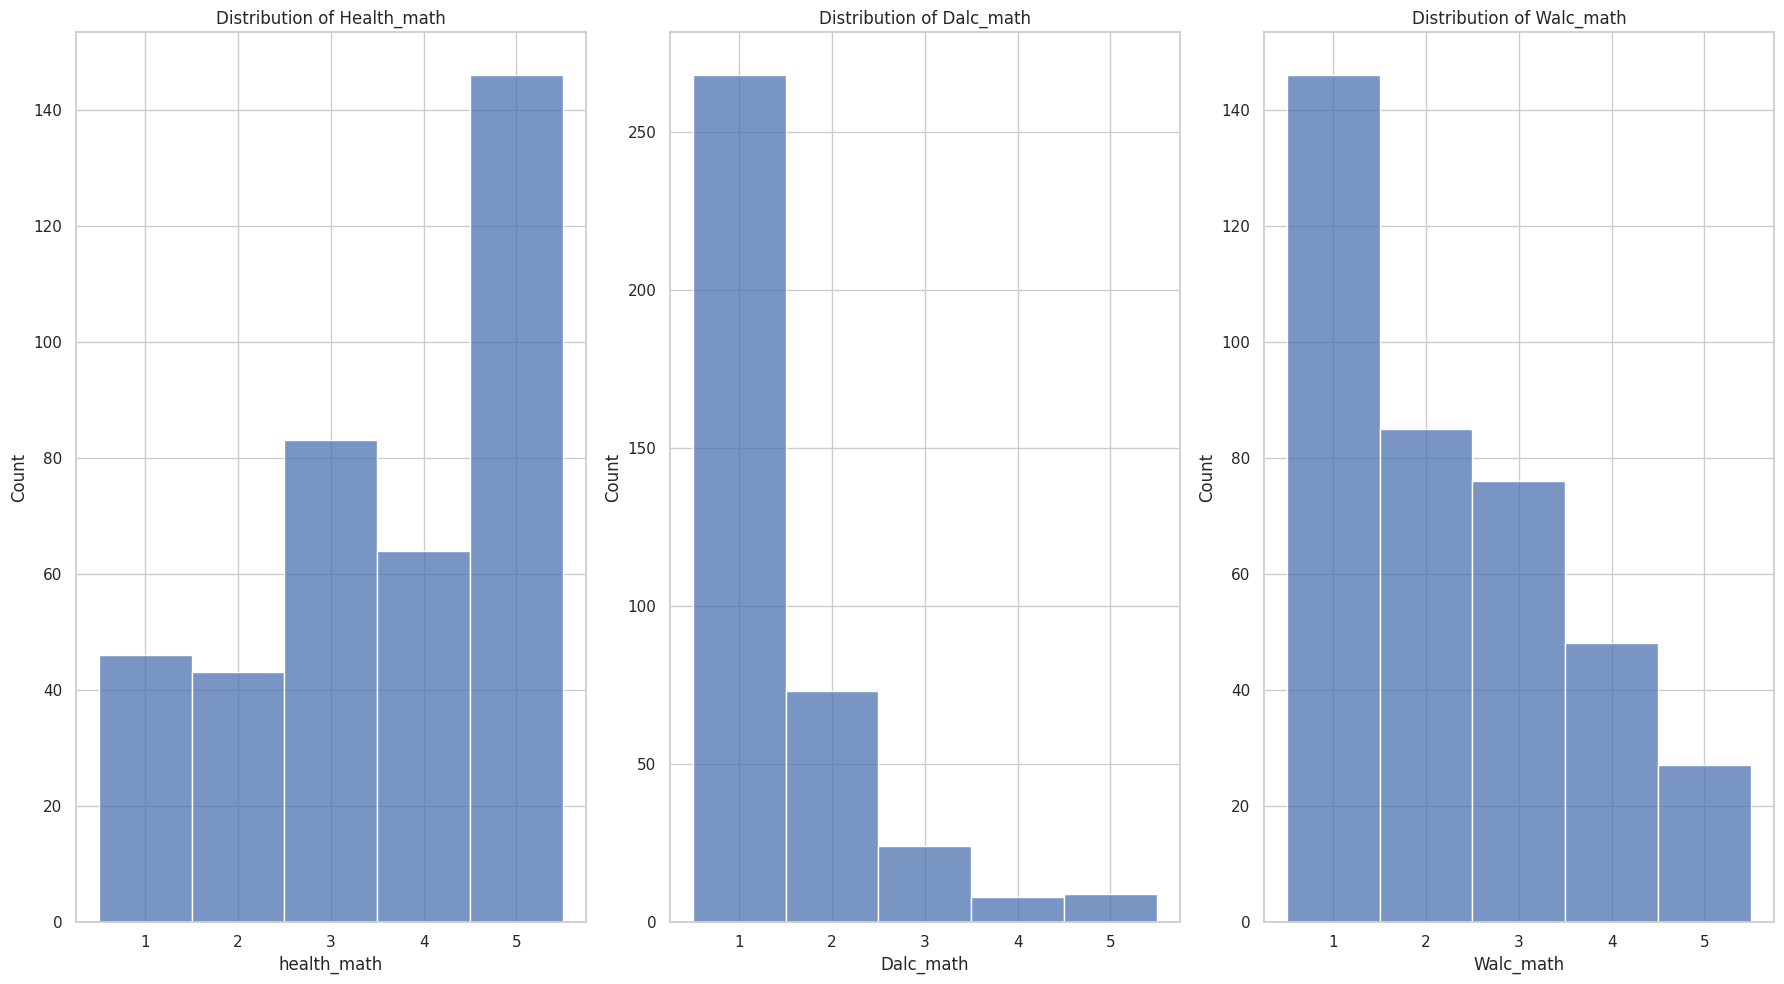

In [36]:

# Define lists
ordinal_health_features = ["health_math", "Dalc_math", "Walc_math"] # scale from 1 to 5

health_features =   ordinal_health_features

# Set style
sns.set(style="whitegrid")

# Initialize subplot grid: total features = 5 → 5 rows, 2 cols (dist + performance)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))
axs = axs.flatten()

# Plot
for i, feature in enumerate(health_features):
        sns.histplot(data=final_cleaned_df, x=feature, bins=5, discrete=True, kde=False, ax=axs[i])
        axs[i].set_title(f"Distribution of {feature.capitalize()}")


# Layout
plt.tight_layout()
plt.show()

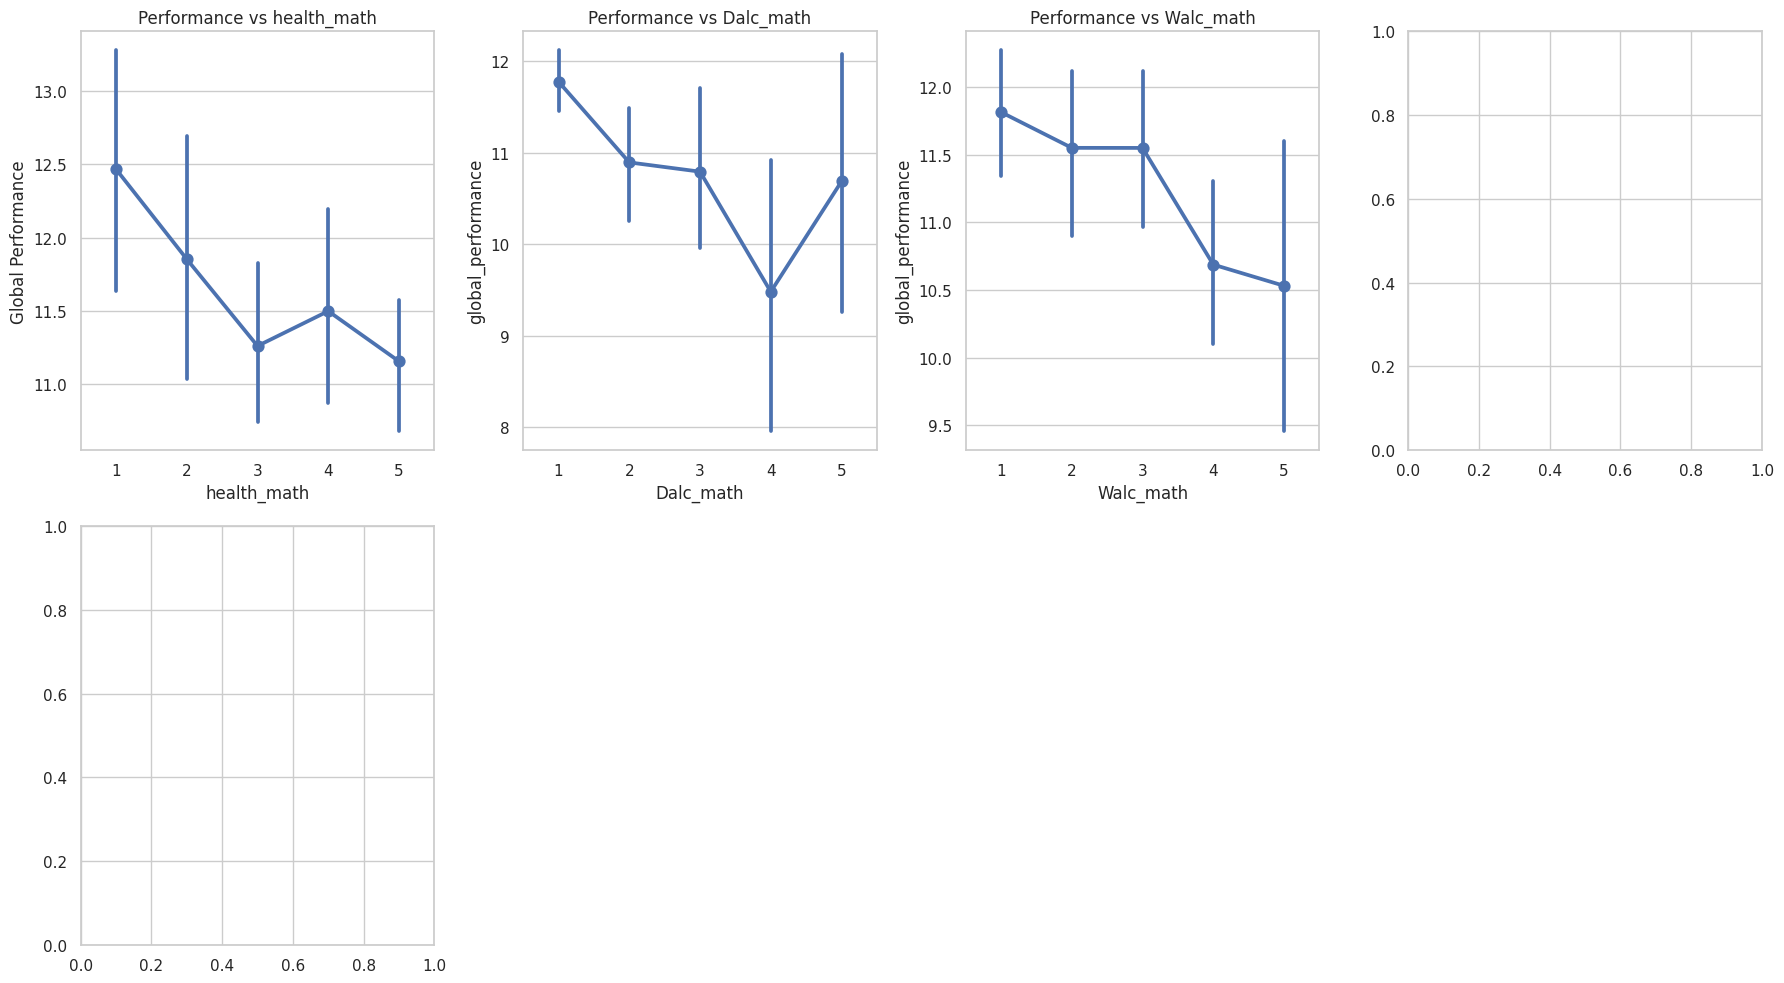

In [37]:
# Define lists
ordinal_health_features = ["health_math", "Dalc_math", "Walc_math"] # scale from 1 to 5

health_features =   ordinal_health_features


fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axs = axs.flatten()

for i, feature in enumerate(health_features):
    if feature in ordinal_health_features:
      # here we can use boxplot as we did before,
      # but for diversivided experementation we prefered to try pointplot
      sns.pointplot(data=final_cleaned_df, x=feature, y="global_performance", ax=axs[i])

    axs[i].set_title(f"Performance vs {feature}")
    axs[i].set_xlabel(feature)
    if i == 0:
      axs[i].set_ylabel("Global Performance")


# Remove extra subplot (if any)
if len(social_features) < len(axs):
    for j in range(len(social_features), len(axs)):
        fig.delaxes(axs[j])


plt.tight_layout()
plt.show()

we keep all, as they show clear trends

7. ***Performance Features*** : These are to be considered as a *target feature*. For a compehensice study we choosed the *globa_performance* as our target.

    * math_performance — avg of G1, G2, G3 in math

    * por_performance — avg of G1, G2, G3 in Portuguese

    * global_performance — overall performance across subjects (our choosen target)

now we'll process and adjust the dataset as analysis has showed

In [38]:
final_cleaned_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian_math',
       'schoolsup_math', 'higher_math', 'famsup_math', 'activities_math',
       'romantic_math', 'traveltime_math', 'studytime_math', 'goout_math',
       'Dalc_math', 'Walc_math', 'freetime_math', 'famrel_math', 'health_math',
       'failures_math', 'failures_por', 'absences_math', 'absences_por',
       'G1_math', 'G2_math', 'G3_math', 'G1_por', 'G2_por', 'G3_por',
       'math_performance', 'por_performance', 'global_performance',
       'absences_math_level', 'absences_por_level'],
      dtype='object')

In [39]:
columns_to_drop = ['school', 'sex', 'Fedu', 'nursery', 'Pstatus', 'freetime_math', 'goout_math']
final_cleaned_df.drop(columns=columns_to_drop, inplace=True)
final_cleaned_df.columns

Index(['age', 'address', 'famsize', 'Medu', 'Mjob', 'Fjob', 'reason',
       'internet', 'guardian_math', 'schoolsup_math', 'higher_math',
       'famsup_math', 'activities_math', 'romantic_math', 'traveltime_math',
       'studytime_math', 'Dalc_math', 'Walc_math', 'famrel_math',
       'health_math', 'failures_math', 'failures_por', 'absences_math',
       'absences_por', 'G1_math', 'G2_math', 'G3_math', 'G1_por', 'G2_por',
       'G3_por', 'math_performance', 'por_performance', 'global_performance',
       'absences_math_level', 'absences_por_level'],
      dtype='object')

In [40]:
final_cleaned_df['guardian_math'] = final_cleaned_df['guardian_math'].map(lambda x: 1 if x in ['mother', 'father'] else 0)


In [41]:
final_cleaned_df['failures_total'] = final_cleaned_df['failures_math'] + final_cleaned_df['failures_por']
final_cleaned_df['failures_total'] = final_cleaned_df['failures_total'].apply(lambda x: x if 1 <= x < 3 else (4 if x >= 3 else 0))

final_cleaned_df['absences'] = final_cleaned_df['absences_math'] + final_cleaned_df['absences_por']

In [42]:
def bin_absences(x):
    if x <= 4:
        return 0
    elif x <= 15:
        return 1
    else:
        return 2

In [43]:
final_cleaned_df['absences_level'] = final_cleaned_df['absences'].apply(bin_absences)

final_cleaned_df.drop(columns=['failures_math', 'failures_por', 'absences_math', 'absences_por'], inplace=True)

print(final_cleaned_df)

     age address famsize  Medu      Mjob      Fjob  reason internet  \
0     18       U     GT3     4   at_home   teacher  course       no   
1     17       U     GT3     1   at_home     other  course      yes   
2     15       U     LE3     1   at_home     other   other      yes   
3     15       U     GT3     4    health  services    home      yes   
4     16       U     GT3     3     other     other    home       no   
..   ...     ...     ...   ...       ...       ...     ...      ...   
377   18       U     LE3     3   teacher  services  course      yes   
378   18       U     GT3     1     other     other  course       no   
379   18       U     GT3     1     other     other  course       no   
380   17       U     LE3     3  services  services  course      yes   
381   18       R     LE3     3  services     other  course      yes   

     guardian_math schoolsup_math  ... G2_por G3_por math_performance  \
0                1            yes  ...     11     11         5.666667   
1

In [44]:
final_cleaned_df.columns

Index(['age', 'address', 'famsize', 'Medu', 'Mjob', 'Fjob', 'reason',
       'internet', 'guardian_math', 'schoolsup_math', 'higher_math',
       'famsup_math', 'activities_math', 'romantic_math', 'traveltime_math',
       'studytime_math', 'Dalc_math', 'Walc_math', 'famrel_math',
       'health_math', 'G1_math', 'G2_math', 'G3_math', 'G1_por', 'G2_por',
       'G3_por', 'math_performance', 'por_performance', 'global_performance',
       'absences_math_level', 'absences_por_level', 'failures_total',
       'absences', 'absences_level'],
      dtype='object')

In [45]:
label_cols = final_cleaned_df.select_dtypes(include='object').columns
encoders = {}
for col in label_cols:
    encoder = LabelEncoder()
    final_cleaned_df[col] = encoder.fit_transform(final_cleaned_df[col].astype(str))
    encoders[col] = encoder

In [46]:
yes_no_cols = [col for col in final_cleaned_df.columns if final_cleaned_df[col].dropna().isin(['yes', 'no']).all()]
for col in yes_no_cols:
    final_cleaned_df[col] = final_cleaned_df[col].map({'yes': 1, 'no': 0})

In [47]:
final_cleaned_df.head()

,age,address,famsize,Medu,Mjob,Fjob,reason,internet,guardian_math,schoolsup_math,...,G2_por,G3_por,math_performance,por_performance,global_performance,absences_math_level,absences_por_level,failures_total,absences,absences_level
0,18,1,0,4,0,4,0,0,1,1,...,11,11,5.666667,7.333333,6.500000,Moderate,Low,0,10,1
1,17,1,0,1,0,2,0,1,1,0,...,11,11,5.333333,10.333333,7.833333,Low,Low,0,6,1
2,15,1,1,1,0,2,2,1,1,1,...,13,12,8.333333,12.333333,10.333333,Moderate,Moderate,4,16,2
3,15,1,0,4,1,3,1,1,1,0,...,14,14,14.666667,14.000000,14.333333,Low,None,0,2,0
4,16,1,0,3,2,2,1,0,1,0,...,13,13,8.666667,12.333333,10.500000,Low,None,0,4,0


In [48]:
for col in final_cleaned_df.columns:
    print(f"{col}: {final_cleaned_df[col].unique()}")


age: [18 17 15 16 19 22 20]
address: [1 0]
famsize: [0 1]
Medu: [4 1 3 2 0]
Mjob: [0 1 2 3 4]
Fjob: [4 2 3 1 0]
reason: [0 2 1 3]
internet: [0 1]
guardian_math: [1 0]
schoolsup_math: [1 0]
higher_math: [1 0]
famsup_math: [0 1]
activities_math: [0 1]
romantic_math: [0 1]
traveltime_math: [2 1 3 4]
studytime_math: [2 3 1 4]
Dalc_math: [1 2 5 3 4]
Walc_math: [1 3 2 4 5]
famrel_math: [4 5 3 1 2]
health_math: [3 5 1 2 4]
G1_math: [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2_math: [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  0]
G3_math: [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]
G1_por: [ 0  9 12 14 11 13 10 15 17  8 16 18  7 19  5]
G2_por: [11 13 14 12 16 17  8 10 15  9  7 18 19  5]
G3_por: [11 12 14 13 17 15  7 10 16  9  6  8 18  0  1  5 19]
math_performance: [ 5.66666667  5.33333333  8.33333333 14.66666667  8.66666667 15.
 11.66666667 17.66666667  9.         11.33333333 14.         10.33333333
 15.33333333 13.66666667  9.33333333 12.66666667  7.66666667 11.
 10.6

In [49]:
final_cleaned_df.drop(columns=['absences_math_level', 'absences_por_level'], inplace=True)


In [50]:
for col in final_cleaned_df.columns:
    print(f"{col}: {final_cleaned_df[col].unique()}")


age: [18 17 15 16 19 22 20]
address: [1 0]
famsize: [0 1]
Medu: [4 1 3 2 0]
Mjob: [0 1 2 3 4]
Fjob: [4 2 3 1 0]
reason: [0 2 1 3]
internet: [0 1]
guardian_math: [1 0]
schoolsup_math: [1 0]
higher_math: [1 0]
famsup_math: [0 1]
activities_math: [0 1]
romantic_math: [0 1]
traveltime_math: [2 1 3 4]
studytime_math: [2 3 1 4]
Dalc_math: [1 2 5 3 4]
Walc_math: [1 3 2 4 5]
famrel_math: [4 5 3 1 2]
health_math: [3 5 1 2 4]
G1_math: [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2_math: [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  0]
G3_math: [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]
G1_por: [ 0  9 12 14 11 13 10 15 17  8 16 18  7 19  5]
G2_por: [11 13 14 12 16 17  8 10 15  9  7 18 19  5]
G3_por: [11 12 14 13 17 15  7 10 16  9  6  8 18  0  1  5 19]
math_performance: [ 5.66666667  5.33333333  8.33333333 14.66666667  8.66666667 15.
 11.66666667 17.66666667  9.         11.33333333 14.         10.33333333
 15.33333333 13.66666667  9.33333333 12.66666667  7.66666667 11.
 10.6

In [51]:
final_cleaned_df.columns

Index(['age', 'address', 'famsize', 'Medu', 'Mjob', 'Fjob', 'reason',
       'internet', 'guardian_math', 'schoolsup_math', 'higher_math',
       'famsup_math', 'activities_math', 'romantic_math', 'traveltime_math',
       'studytime_math', 'Dalc_math', 'Walc_math', 'famrel_math',
       'health_math', 'G1_math', 'G2_math', 'G3_math', 'G1_por', 'G2_por',
       'G3_por', 'math_performance', 'por_performance', 'global_performance',
       'failures_total', 'absences', 'absences_level'],
      dtype='object')

In [52]:
final_cleaned_df.drop(columns=['math_performance', 'por_performance', 'global_performance'], inplace = True)

In [53]:
final_cleaned_df.columns

Index(['age', 'address', 'famsize', 'Medu', 'Mjob', 'Fjob', 'reason',
       'internet', 'guardian_math', 'schoolsup_math', 'higher_math',
       'famsup_math', 'activities_math', 'romantic_math', 'traveltime_math',
       'studytime_math', 'Dalc_math', 'Walc_math', 'famrel_math',
       'health_math', 'G1_math', 'G2_math', 'G3_math', 'G1_por', 'G2_por',
       'G3_por', 'failures_total', 'absences', 'absences_level'],
      dtype='object')

# Modeling

## splitting into train test

In [54]:
X_global = final_cleaned_df.drop(columns=['G3_math'])
y_global = final_cleaned_df['G3_math']

In [55]:
X_global_train, X_global_test, y_global_train, y_global_test = train_test_split(X_global, y_global, test_size=0.2, random_state=42)

In [56]:
print("combined Dataset:")
print("Training samples:", len(X_global_train))
print("Testing samples:", len(X_global_test))

combined Dataset:
Training samples: 305
Testing samples: 77


we'll have now to scale the features

In [57]:
scalar = StandardScaler()
X_global_train_scaled = scalar.fit_transform(X_global_train)
X_global_test_scaled = scalar.fit_transform(X_global_test)

We will evaluate the performance of our regression models using the following metrics:

**MAE (Mean Absolute Error):**
Measures the average magnitude of errors in the predictions, without considering their direction.

A lower MAE indicates better model accuracy.

**MSE (Mean Squared Error)**:

Calculates the average of the squared differences between the predicted and actual values.

MSE penalizes larger errors more heavily, making it sensitive to outliers.

**RMSE (Root Mean Squared Error)**:

The square root of the MSE, providing an error measure in the same units as the target variable.

A lower RMSE indicates better predictive accuracy.

**R² (R-squared)**:

Represents the proportion of variance in the target variable explained by the model.

A higher R² indicates that the model fits the data better.

These metrics will help us assess how well our models perform in predicting the target variable and guide us in model selection and improvement.

## KNN

### Training

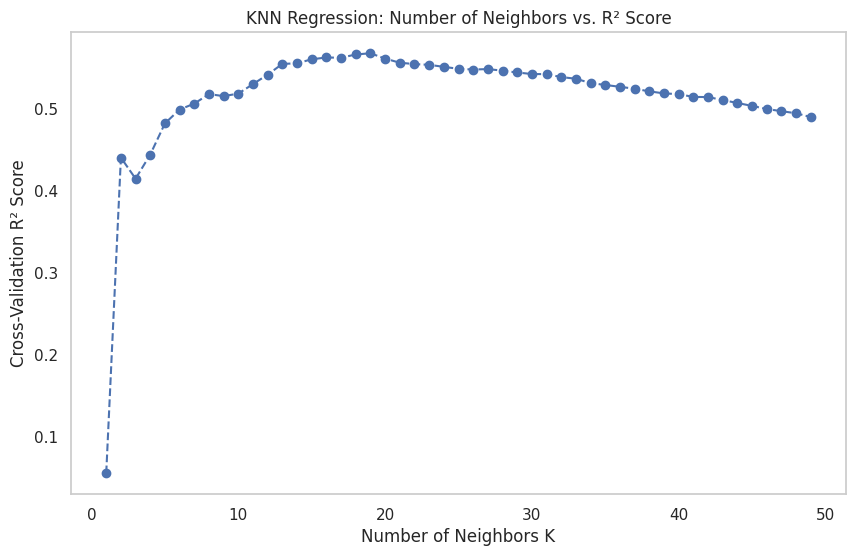

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

neighbors = range(1, 50)

cv_scores = []


for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k,weights='distance')
    scores = cross_val_score(knn, X_global_train_scaled, y_global_train, cv=10, scoring='r2')
    cv_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(neighbors, cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation R² Score')
plt.title('KNN Regression: Number of Neighbors vs. R² Score')
plt.grid()
plt.show()


In [59]:
knn = KNeighborsRegressor(n_neighbors=10,weights='distance')
knn.fit(X_global_train_scaled, y_global_train)

y_pred_knn = knn.predict(X_global_test_scaled)


### Evaluation

In [60]:
mae_knn = mean_absolute_error(y_global_test, y_pred_knn)
mse_knn = mean_squared_error(y_global_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_global_test, y_pred_knn)

print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"R² Score: {r2_knn:.2f}")

Mean Absolute Error (MAE): 2.17
Mean Squared Error (MSE): 8.95
Root Mean Squared Error (RMSE): 2.99
R² Score: 0.60


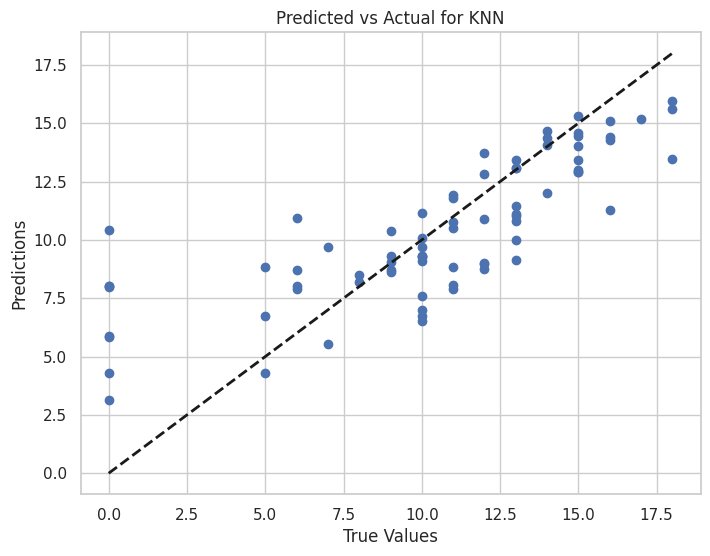

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(y_global_test, y_pred_knn)
plt.plot([y_global_test.min(), y_global_test.max()], [y_global_test.min(), y_global_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs Actual for KNN')
plt.show()


These suggest the model is doing okay, but there's clear room for improvement.
a collection of more data that could be important and that it influences the grade could be collected for better prediction.

Since the performance hasn't significantly improved, this suggests the model's capacity is limited. To achieve better results, we can explore more complex models, such as Random Forest, which might offer improved performance through ensemble learning.

## Linear Regression

### Training

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr = LinearRegression()

lr.fit(X_global_train_scaled, y_global_train)

y_pred_lr = lr.predict(X_global_test_scaled)


### Evaluation

In [63]:
mae_lr = mean_absolute_error(y_global_test, y_pred_lr)
mse_lr = mean_squared_error(y_global_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_global_test, y_pred_lr)

print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")


Mean Absolute Error (MAE): 1.39
Mean Squared Error (MSE): 4.47
Root Mean Squared Error (RMSE): 2.12
R² Score: 0.80


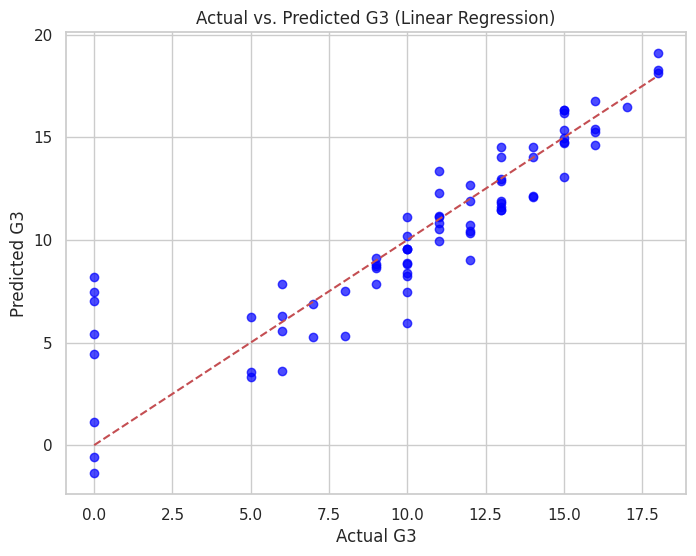

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_global_test, y_pred_lr, alpha=0.7, color='blue')
plt.plot([y_global_test.min(), y_global_test.max()], [y_global_test.min(), y_global_test.max()], '--r')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs. Predicted G3 (Linear Regression)")
plt.grid(True)
plt.show()


linear regression model explains 80% of the variance in student performance — a big jump from 60% with KNN
we have seen this because there is a clear linear relationship between g1 and g2 of both portugese and mathematics witht their g3.


we will now apply PCA to see if the model can be improved

In [65]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_global_train_scaled)
X_test_pca = pca.transform(X_global_test_scaled)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_global_train)

y_pred_pca = lr_pca.predict(X_test_pca)

mae_pca = mean_absolute_error(y_global_test, y_pred_pca)
mse_pca = mean_squared_error(y_global_test, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
r2_pca = r2_score(y_global_test, y_pred_pca)

print(" Linear Regression after PCA:")
print(f"MAE: {mae_pca:.2f}")
print(f"MSE: {mse_pca:.2f}")
print(f"RMSE: {rmse_pca:.2f}")
print(f"R² Score: {r2_pca:.2f}")


 Linear Regression after PCA:
MAE: 1.61
MSE: 5.34
RMSE: 2.31
R² Score: 0.76


Compared to the original model (R² = 0.80), the performance slightly decreased. While PCA successfully reduced the number of features, it introduced some loss of information that impacted the model's predictive power. This suggests that in our case, dimensionality reduction did not improve — and slightly hindered — the performance of the linear regression model.

## Decision Tree Regression Algorithm

### Training

In [66]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_global_train, y_global_train)
y_pred_dt = dt_regressor.predict(X_global_test)


### Evaluation

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_dt = mean_absolute_error(y_global_test, y_pred_dt)
mse_dt = mean_squared_error(y_global_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_global_test, y_pred_dt)

print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R²: {r2_dt:.2f}")


MAE: 1.29
MSE: 5.44
RMSE: 2.33
R²: 0.76


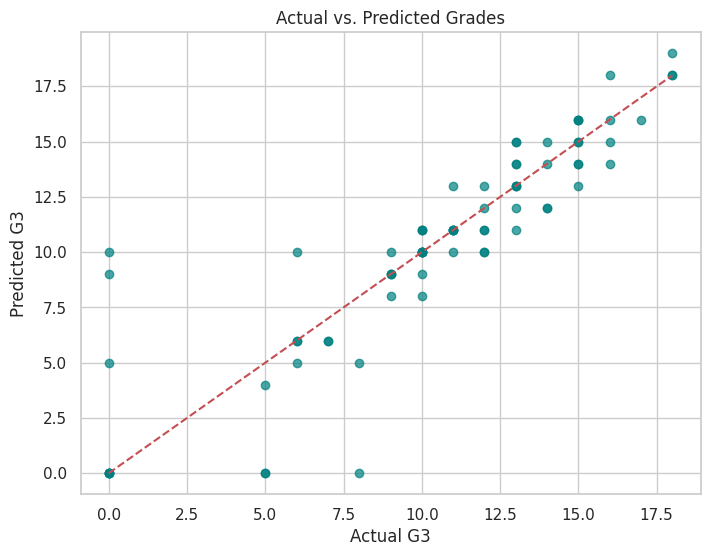

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_global_test, y_pred_dt, alpha=0.7, color='teal')
plt.plot([y_global_test.min(), y_global_test.max()], [y_global_test.min(), y_global_test.max()], 'r--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs. Predicted Grades")
plt.grid(True)
plt.show()


The initial Decision Tree Regression model yielded moderate results, with an R² score of 0.76, MAE of 1.29, and RMSE of 2.33. While the model was able to capture some of the variance in student performance, it showed signs of overfitting or suboptimal depth, leading to less consistent generalization compared to other models like Linear Regression. These results indicated potential for improvement through hyperparameter tuning.%

To enhance performance, we applied hyperparameter tuning using GridSearchCV.

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

grid_search_dt.fit(X_global_train, y_global_train)

best_dt = grid_search_dt.best_estimator_

y_pred_best_dt = best_dt.predict(X_global_test)
mae_best = mean_absolute_error(y_global_test, y_pred_best_dt)
mse_best = mean_squared_error(y_global_test, y_pred_best_dt)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_global_test, y_pred_best_dt)

print(" Tuned Decision Tree:")
print("Best Parameters:", grid_search_dt.best_params_)
print(f"MAE: {mae_best:.2f}")
print(f"MSE: {mse_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²: {r2_best:.2f}")


 Tuned Decision Tree:
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
MAE: 1.54
MSE: 5.56
RMSE: 2.36
R²: 0.75


optimizing key parameters: max_depth, min_samples_split, and min_samples_leaf. The best configuration found was max_depth=3, min_samples_leaf=1, and min_samples_split=2. With these settings, the model achieved an R² score of 0.75, MAE of 1.54, and RMSE of 2.36. Although the tuning slightly improved model robustness and maintained comparable performance, the Decision Tree still underperforms relative to Linear Regression (R² = 0.80). This suggests that more sophisticated ensemble methods like Random Forest or Gradient Boosting may offer further gains in predictive accuracy

## Random Forest Regressor

### Training

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [71]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_global_train, y_global_train)

y_pred_rf = rf_model.predict(X_global_test)


### Evaluation

In [72]:
mae_rf = mean_absolute_error(y_global_test, y_pred_rf)
mse_rf = mean_squared_error(y_global_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_global_test, y_pred_rf)

print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")


MAE: 1.21
MSE: 3.63
RMSE: 1.91
R²: 0.84


Random Forest Regressor shows strong performance, with an MAE of 1.21, RMSE of 1.91, and an R² score of 0.84 — the highest among all models tested so far. This indicates that the model captures a significant portion of the variance in student performance and makes more accurate predictions overall.

The low error metrics and high R² suggest that the ensemble nature of Random Forest — which combines multiple decision trees and averages their outputs — helps reduce overfitting and handles complex, nonlinear relationships more effectively than simpler models like basic Decision Trees or Linear Regression. These results highlight Random Forest as a highly promising approach for this regression task.

## SVM

### Training

In [73]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

svr = SVR(kernel='linear')

svr.fit(X_global_train_scaled, y_global_train)

y_pred_svr = svr.predict(X_global_test_scaled)


### Evaluation

In [74]:
mae_svr = mean_absolute_error(y_global_test, y_pred_svr)
mse_svr = mean_squared_error(y_global_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_global_test, y_pred_svr)

print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R² Score: {r2_svr:.2f}")


Mean Absolute Error (MAE): 1.19
Mean Squared Error (MSE): 4.84
Root Mean Squared Error (RMSE): 2.20
R² Score: 0.78


Support Vector Regression (SVR) model achieved an MAE of 1.19, RMSE of 2.20, and an R² score of 0.78, indicating solid predictive performance. The relatively low MAE shows that the model makes accurate predictions on average, while the R² score suggests it captures a good portion of the variance in student performance — though not as much as Random Forest.

Despite being slightly outperformed by Random Forest (R² = 0.84), SVR demonstrates strong generalization, especially when the data is not linearly separable.

Further tuning of kernel functions and parameters like C, epsilon, and gamma could potentially boost its performance even more.

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

# Create GridSearchCV
grid_search_svr = GridSearchCV(
    SVR(),
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search_svr.fit(X_global_train_scaled, y_global_train)

# Best model and evaluation
best_svr = grid_search_svr.best_estimator_
y_pred_best_svr = best_svr.predict(X_global_test_scaled)

# Metrics
mae = mean_absolute_error(y_global_test, y_pred_best_svr)
mse = mean_squared_error(y_global_test, y_pred_best_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_global_test, y_pred_best_svr)

# Print
print("Tuned SVR:")
print("Best Parameters:", grid_search_svr.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Tuned SVR:
Best Parameters: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
MAE: 1.16
MSE: 4.91
RMSE: 2.22
R²: 0.78


With these parameters, the model reached an MAE of 1.16, RMSE of 2.22, and an R² score of 0.78 — maintaining a similar level of explained variance as the untuned version, but with marginally better accuracy. While still trailing behind Random Forest in overall performance, the tuned SVR demonstrates consistent and reliable results, making it a solid option, especially when interpretability and robustness to outliers are important.

## Artificial Neural Networks

### Training

In [76]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

ann_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
ann_regressor.fit(X_global_train_scaled, y_global_train)

y_pred_ann = ann_regressor.predict(X_global_test_scaled)

### Evaluation

In [77]:
mae_ann = mean_absolute_error(y_global_test, y_pred_ann)
mse_ann = mean_squared_error(y_global_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
r2_ann = r2_score(y_global_test, y_pred_ann)

print(f"MAE: {mae_ann:.2f}")
print(f"MSE: {mse_ann:.2f}")
print(f"RMSE: {rmse_ann:.2f}")
print(f"R²: {r2_ann:.2f}")

MAE: 1.78
MSE: 6.23
RMSE: 2.50
R²: 0.72


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metrics = {
    "Model": ["KNN", "Linear Regression", "Decision Tree", "Random Forest", "SVR", "ANN"],
    "MAE": [mae_knn, mae_lr, mae_dt, mae_rf, mae_svr, mae_ann],
    "MSE": [mse_knn, mse_lr, mse_dt, mse_rf, mse_svr, mse_ann],
    "RMSE": [rmse_knn, rmse_lr, rmse_dt, rmse_rf, rmse_svr, rmse_ann],
    "R²": [r2_knn, r2_lr, r2_dt, r2_rf, r2_svr, r2_ann]
}

df_metrics = pd.DataFrame(metrics)

df_metrics.set_index("Model", inplace=True)

print(df_metrics)


                        MAE       MSE      RMSE        R²
Model                                                    
KNN                2.167424  8.952820  2.992126  0.598860
Linear Regression  1.387946  4.473735  2.115121  0.799550
Decision Tree      1.285714  5.441558  2.332715  0.756185
Random Forest      1.205974  3.634114  1.906335  0.837170
SVR                1.188053  4.844069  2.200925  0.782957
ANN                1.784201  6.225653  2.495126  0.721053


<Figure size 1000x600 with 0 Axes>

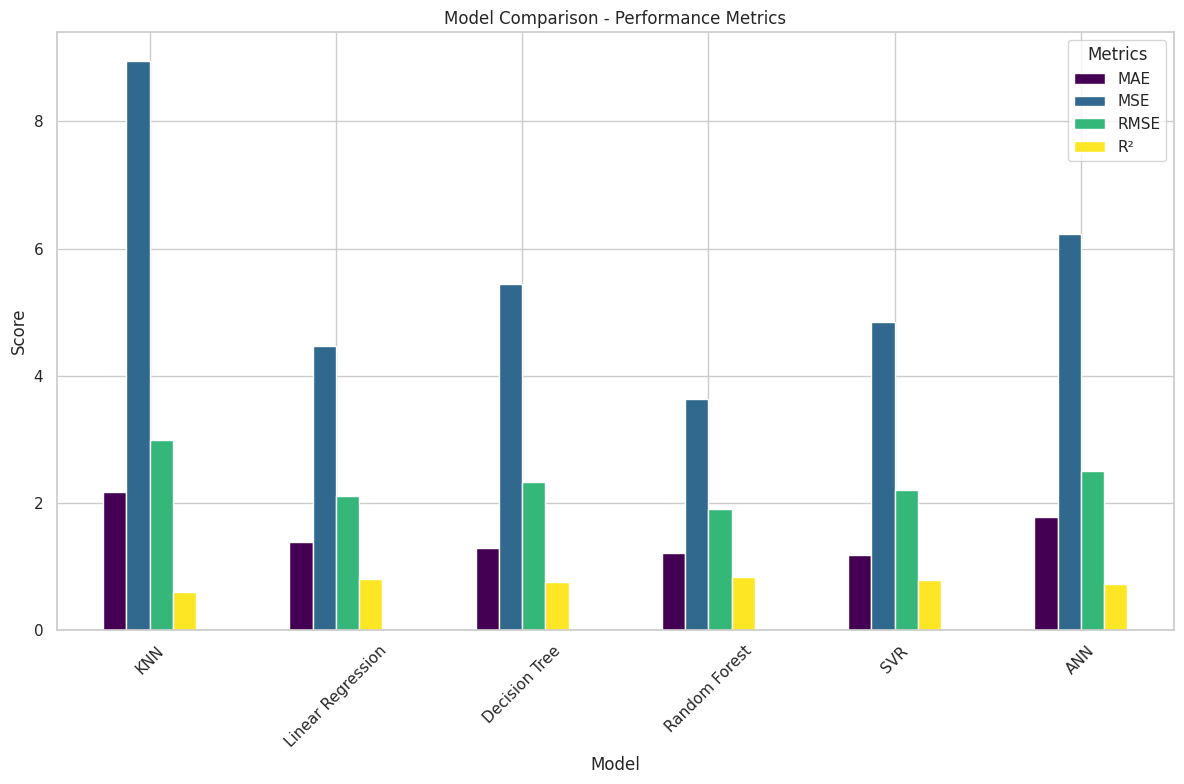

In [79]:
plt.figure(figsize=(10, 6))

df_metrics.plot(kind="bar", figsize=(12, 8), colormap="viridis")

plt.title("Model Comparison - Performance Metrics")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.tight_layout()

plt.show()